## Problem Statement 

#### Hypothesis 4: Smart cities with better institutional innovation are likely to have lower crime rate 

#### Proposed Solution:
* The objective of this hack idea is to predict the likelihood/prevalence of crime given the educational level within the city in order words, given the education level of a smart city can we predict crime prevalence.
* As a part of this innovation, we also implemented a web based subject - choice advisor portal as a proactive measure to boost and improve education thus, leading to lower crime in society.

### Crime Detection Model - Propensity to commit Crime
* We will create a binary classification model that predict crime given education level

## Approach
1. import libraries
2. Load Data
3. Create User defined functions
4. Data Preprosessing
5. EDA: Univariate
6. EDA: Bivariate
7. EDA: Multivariate
8. Feature Engineering
9. Data Scaling & Normalization
10. Data Modeling
11. Model Metriic Evaluation
12. Feature Selection & Ranking
13. Conclusion

### Data Dictionary

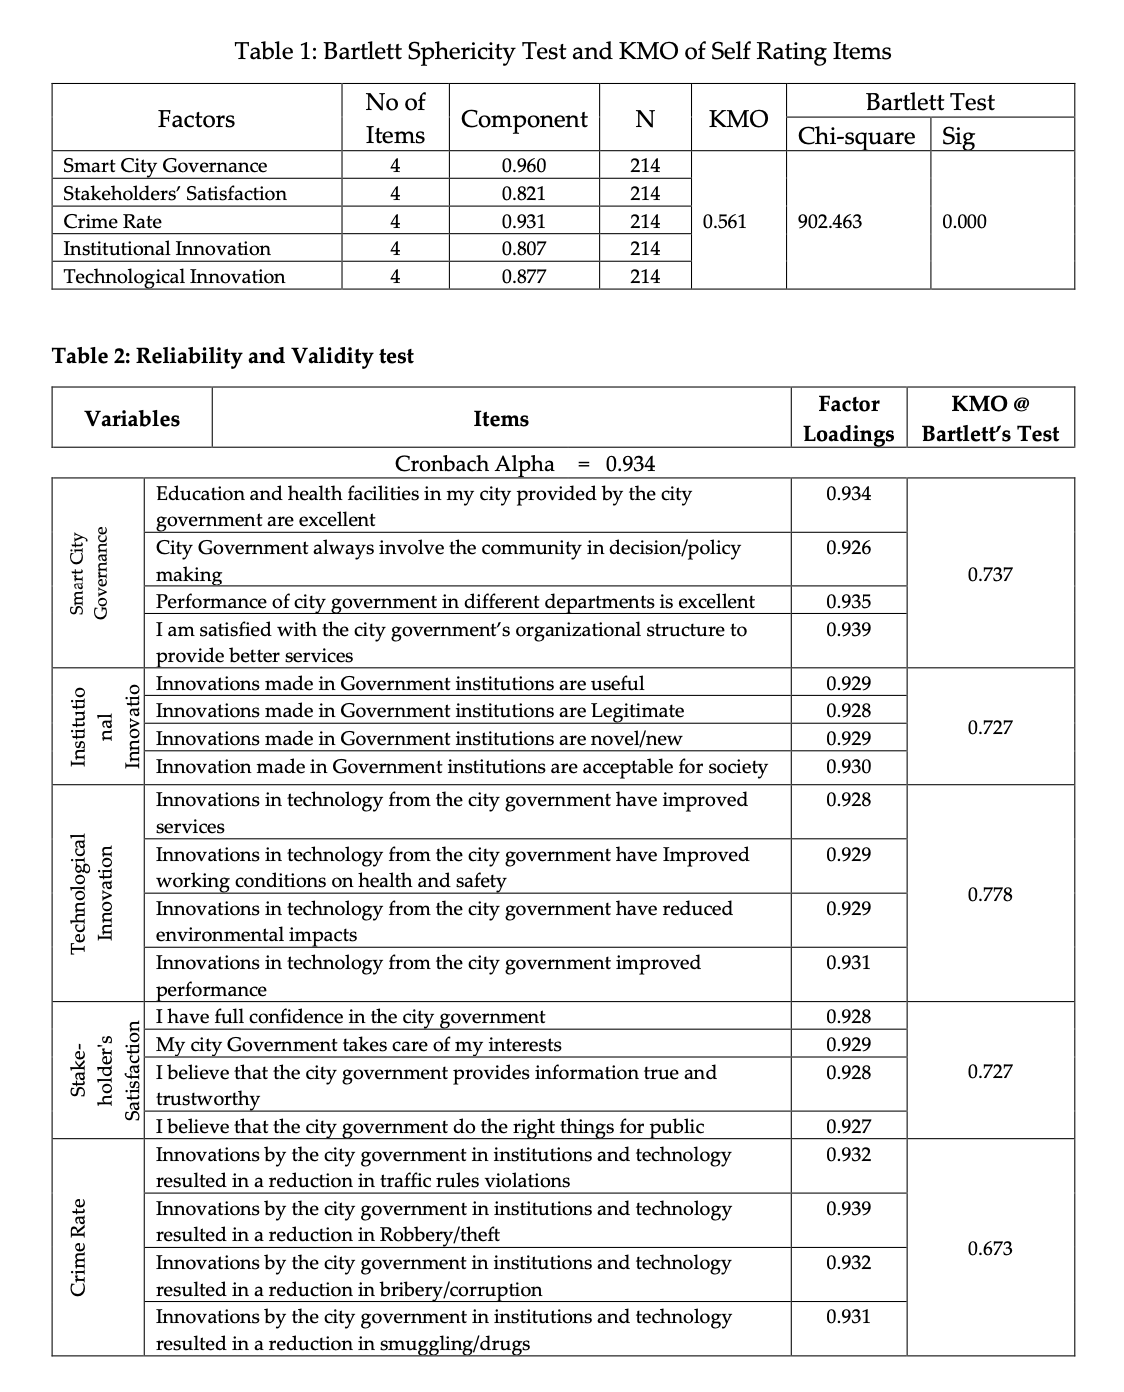

In [1]:
#Read the data dictionary
from IPython.display import Image
Image(filename='data.png',width=800, height=400)

## Import all relevant Libraries 

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
#setting max pandas columns 
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 999
#from pandas_profiling import profile_reporte_report
import warnings
warnings.filterwarnings("ignore")

## Data Loading 

In [3]:
#get data from csv to pandas dataframe
data = pd.read_csv("smart_cities.csv")


### User function
* we are going to create functions that we will use  for EDA 

In [4]:
# Accepts numerical column as the input and returns the boxplots  and histogram visualization


def box_hist(feature, figsize=(15,10), bins = None):
    """ Combined Boxplot and histogram 
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [5]:
# Create a user defined bar graph with % to ephasize distribution and communicate impact
# Though will be used for categorical features mostly but is not limited to those 
def percentiled_bar(feature):
    '''
    plot
    feature: categorical feature
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        plt.xticks(rotation='vertical')    # set labels to vertical orientation
    plt.show()

## Data Prepsocessing 

In [6]:
#check the top 5 rows
data.head()

,SCG1,SCG2,SCG3,SCG4,InstI1,InstI2,InstI3,InstI4,TI1,TI2,TI3,TI4,SS1,SS2,SS3,SS4,CR1,CR2,CR3,CR4,SDM1,SDM2,SDM3,SDM4,GEN,AGE,EDU
0,1.0,2.0,4.0,1.0,5.0,1.0,5.0,2.0,2.0,2.0,5.0,1.0,5.0,5.0,4.0,5.0,5.0,1.0,3.0,1.0,5.0,5.0,4.0,5.0,1.0,1.0,1.0
1,4.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0
2,3.0,5.0,5.0,2.0,5.0,3.0,5.0,2.0,3.0,4.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0
3,5.0,5.0,2.0,1.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,0.0,1.0,2.0
4,4.0,3.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,1.0,2.0,1.0


* We observe that our data was loaded successfully 

In [7]:
#check the dimensions of the datafram
data.shape

(214, 27)

In [8]:
#Check datatypes and their missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SCG1    214 non-null    float64
 1   SCG2    214 non-null    float64
 2   SCG3    214 non-null    float64
 3   SCG4    214 non-null    float64
 4   InstI1  214 non-null    float64
 5   InstI2  214 non-null    float64
 6   InstI3  214 non-null    float64
 7   InstI4  214 non-null    float64
 8   TI1     214 non-null    float64
 9   TI2     214 non-null    float64
 10  TI3     214 non-null    float64
 11  TI4     214 non-null    float64
 12  SS1     214 non-null    float64
 13  SS2     214 non-null    float64
 14  SS3     214 non-null    float64
 15  SS4     214 non-null    float64
 16  CR1     214 non-null    float64
 17  CR2     214 non-null    float64
 18  CR3     214 non-null    float64
 19  CR4     214 non-null    float64
 20  SDM1    214 non-null    float64
 21  SDM2    214 non-null    float64
 22  SD

In [9]:
#Get sum of missing values 
data.isnull().sum().sort_values(ascending=False)

SCG1      0
SS3       0
AGE       0
GEN       0
SDM4      0
SDM3      0
SDM2      0
SDM1      0
CR4       0
CR3       0
CR2       0
CR1       0
SS4       0
SS2       0
SCG2      0
SS1       0
TI4       0
TI3       0
TI2       0
TI1       0
InstI4    0
InstI3    0
InstI2    0
InstI1    0
SCG4      0
SCG3      0
EDU       0
dtype: int64

### There are no missing values 

In [10]:
#Get the data summary or the statistic overview
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SCG1,214.0,3.074766,1.563678,1.0,1.00,3.0,5.0,5.0
SCG2,214.0,3.182243,1.240726,1.0,2.00,3.0,4.0,5.0
SCG3,214.0,3.032710,1.071989,1.0,2.00,3.0,4.0,5.0
SCG4,214.0,2.257009,1.323079,1.0,1.00,2.0,4.0,4.0
InstI1,214.0,3.864486,1.063854,1.0,4.00,4.0,4.0,5.0
InstI2,214.0,3.299065,0.985481,1.0,3.00,3.0,4.0,5.0
InstI3,214.0,3.864486,1.063854,1.0,4.00,4.0,4.0,5.0
InstI4,214.0,2.967290,1.156267,1.0,2.00,3.0,3.0,5.0
TI1,214.0,3.971963,1.170514,1.0,3.00,4.0,5.0,5.0
TI2,214.0,4.065421,1.068288,2.0,4.00,4.0,5.0,5.0


In [11]:
#Sorting the columns/features in ascending order
data.columns.sort_values(ascending=True)

Index(['AGE', 'CR1', 'CR2', 'CR3', 'CR4', 'EDU', 'GEN', 'InstI1', 'InstI2',
       'InstI3', 'InstI4', 'SCG1', 'SCG2', 'SCG3', 'SCG4', 'SDM1', 'SDM2',
       'SDM3', 'SDM4', 'SS1', 'SS2', 'SS3', 'SS4', 'TI1', 'TI2', 'TI3', 'TI4'],
      dtype='object')

In [12]:
#get top 10 randomized sample of the data
data.sample(10)

,SCG1,SCG2,SCG3,SCG4,InstI1,InstI2,InstI3,InstI4,TI1,TI2,TI3,TI4,SS1,SS2,SS3,SS4,CR1,CR2,CR3,CR4,SDM1,SDM2,SDM3,SDM4,GEN,AGE,EDU
162,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
84,1.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,1.0,3.0,1.0,2.0,4.0,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,2.0,2.0
35,1.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,1.0,3.0,1.0,2.0,4.0,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0
209,2.0,3.0,4.0,3.0,4.0,3.0,4.0,2.0,5.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,2.0,3.0,4.0,3.0,4.0,1.0,1.0,1.0
53,5.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,3.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0,1.0,1.0,2.0
145,3.0,4.0,3.0,4.0,2.0,4.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0
81,5.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,3.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0,1.0,1.0,1.0
111,5.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,3.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0,0.0,1.0,1.0
165,1.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,1.0,3.0,1.0,2.0,4.0,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,2.0,1.0
130,5.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,3.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0,0.0,2.0,2.0


## Exploratory Data Analysis
* we are going to perfom descriptive stats to understand the data  as follows:
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis 

## Univariate Analaysis

#### Histogram for all Numeric columns

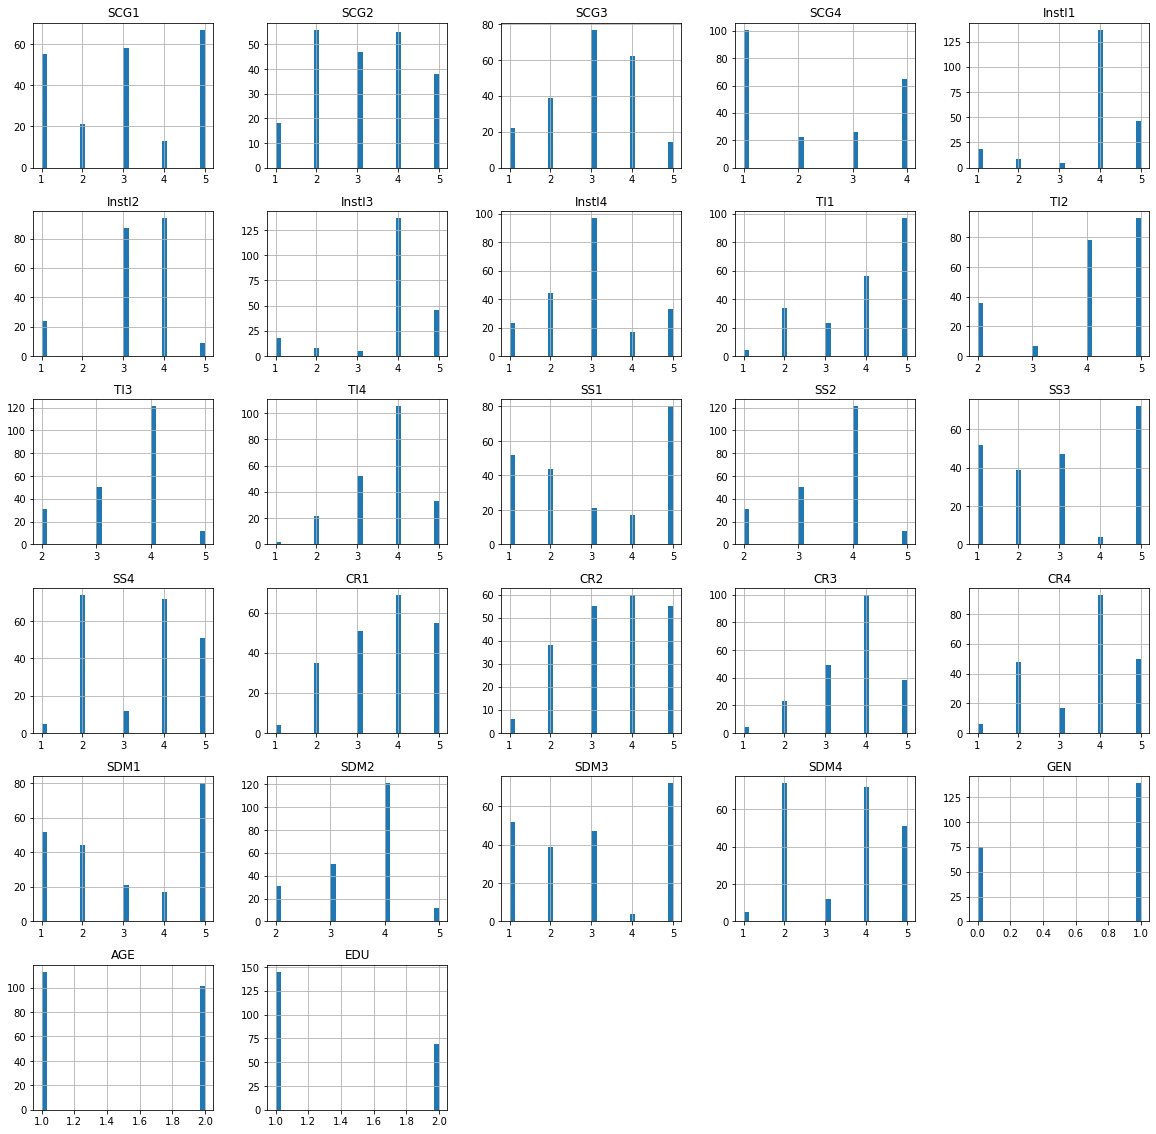

In [13]:
#Check data distribution for all columns 
data.hist(bins=30, figsize=(20, 20))
plt.show()

* Now that we have observed the distribution of all the columns were are going to investigate each column/feature to understand it a bit more

In [14]:
#Sorting the columns/features in ascending order
data.columns.sort_values(ascending=True)

Index(['AGE', 'CR1', 'CR2', 'CR3', 'CR4', 'EDU', 'GEN', 'InstI1', 'InstI2',
       'InstI3', 'InstI4', 'SCG1', 'SCG2', 'SCG3', 'SCG4', 'SDM1', 'SDM2',
       'SDM3', 'SDM4', 'SS1', 'SS2', 'SS3', 'SS4', 'TI1', 'TI2', 'TI3', 'TI4'],
      dtype='object')

In [15]:
#Check AGE group distribution 
data.AGE.value_counts(normalize=True, ascending=False)*100

1.0    52.803738
2.0    47.196262
Name: AGE, dtype: float64

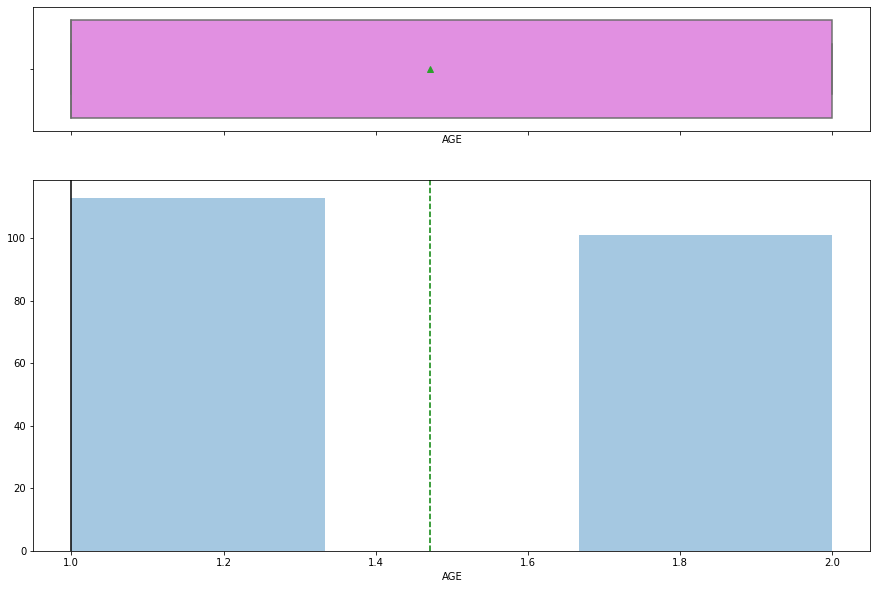

In [16]:
box_hist(data.AGE)

* Observation: we have been two age groups in the dataset in 1 and 2 with:
Age group 1 has the highest population at 52.8% and group 2 has 47.2%
* We will be interested in knowing how this age groups relate to the other features.
* We also want to know how significant is age group in predicting crime
* is there a correlation between age group v education ?


In [17]:
#Check EDU group distribution 
data.EDU.value_counts(normalize=True, ascending=False)*100

1.0    67.757009
2.0    32.242991
Name: EDU, dtype: float64

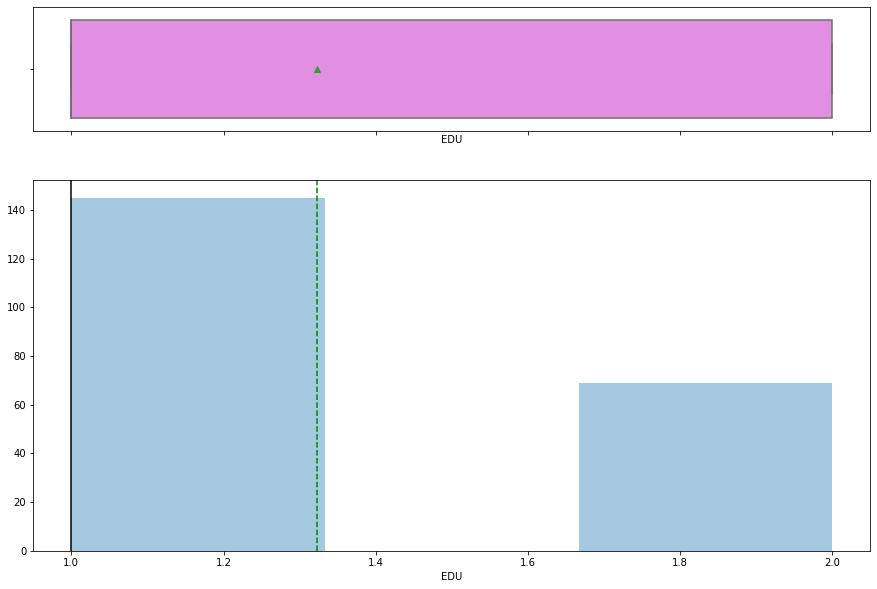

In [18]:
box_hist(data.EDU)

* we observe that education group 1 has the highest distribution at 67.75% while group 2 is 32.24%
* This is a very interesting trend to observe 
* 

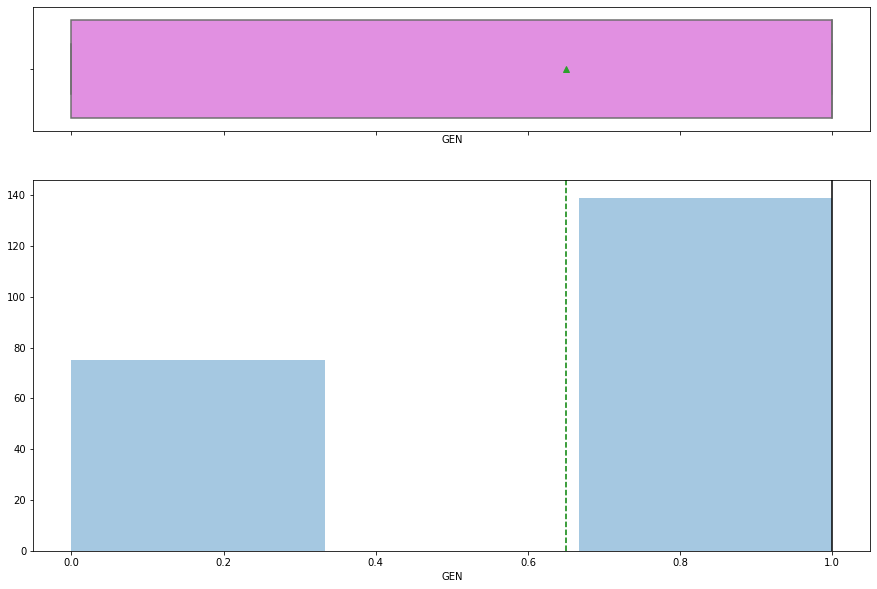

In [19]:
#Checking Gen 
box_hist(data.GEN)

In [20]:
data.GEN.value_counts(normalize=True, ascending=False)*100

1.0    64.953271
0.0    35.046729
Name: GEN, dtype: float64

### CRIME

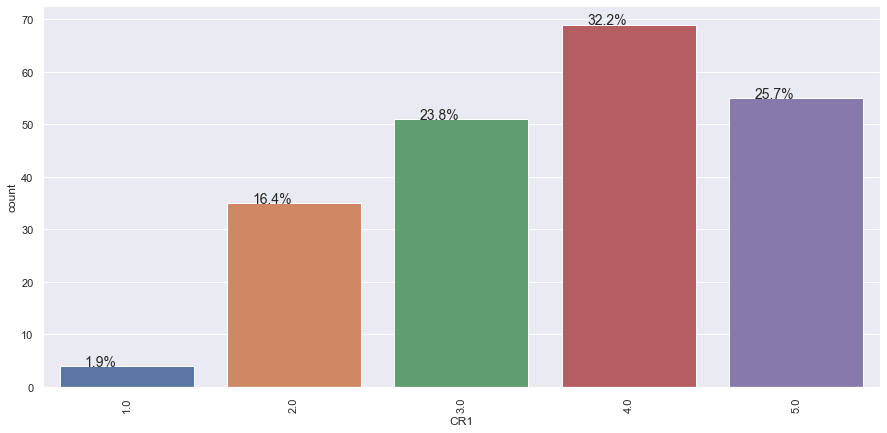

In [21]:
percentiled_bar(data.CR1)

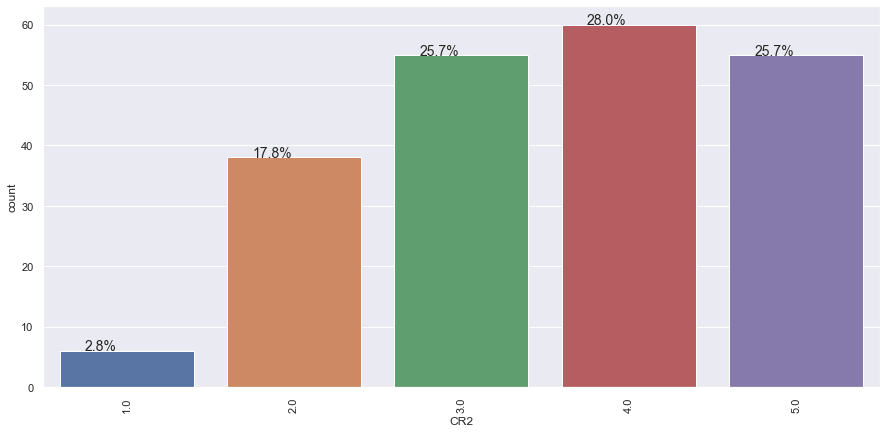

In [22]:
percentiled_bar(data.CR2)

### Observation:
* CR1 & CR2 follow the same distribution. We can drop one of them to reduce complexity

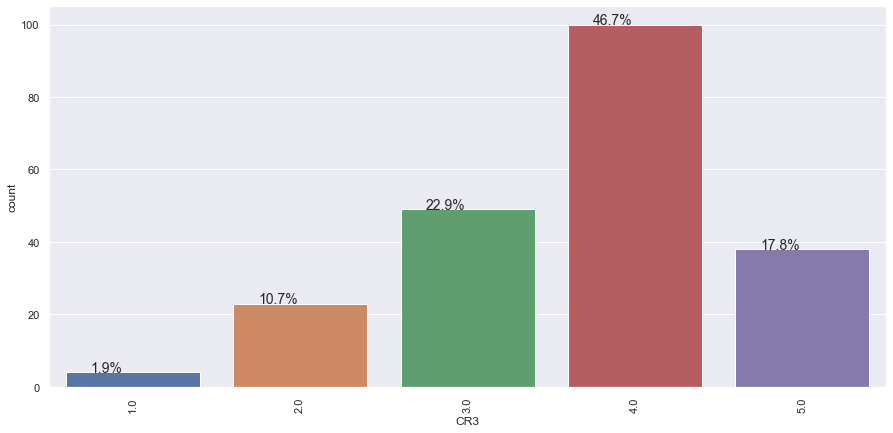

In [23]:
percentiled_bar(data.CR3)

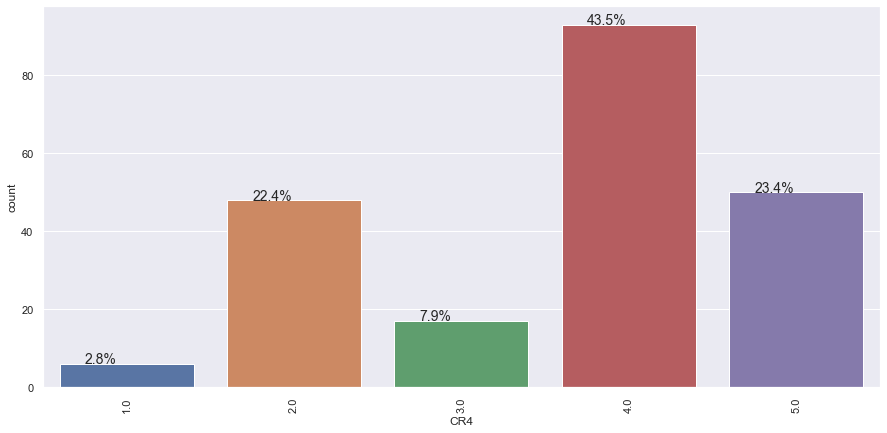

In [24]:
percentiled_bar(data.CR4)

### InstI

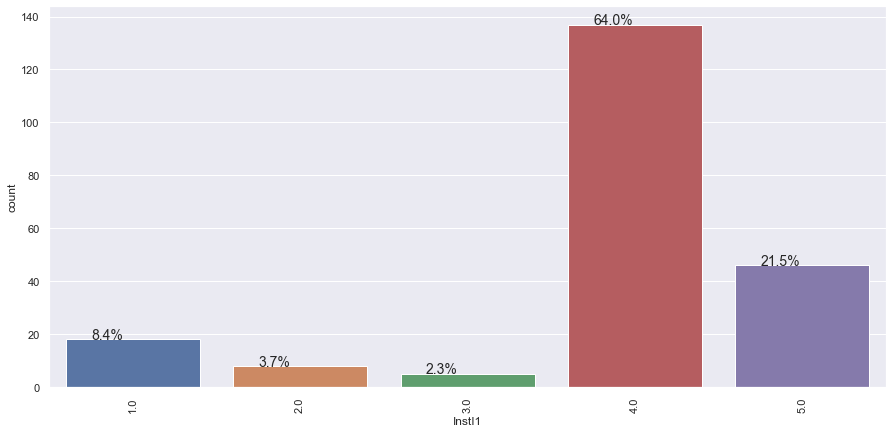

In [25]:
percentiled_bar(data.InstI1)

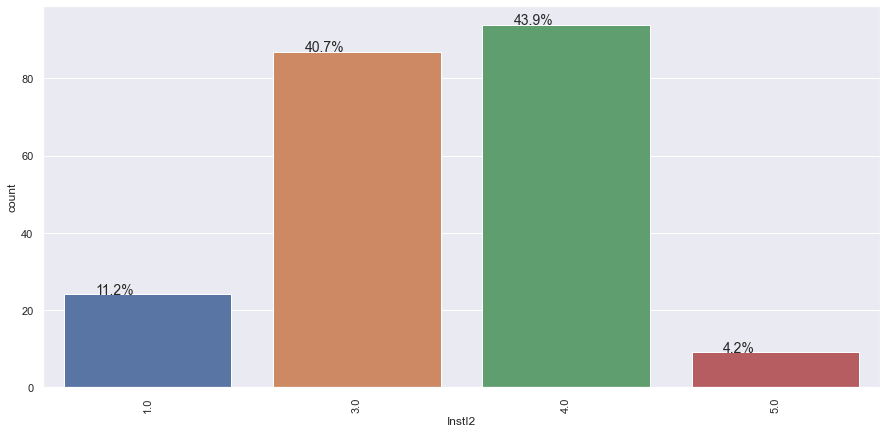

In [26]:
percentiled_bar(data.InstI2)

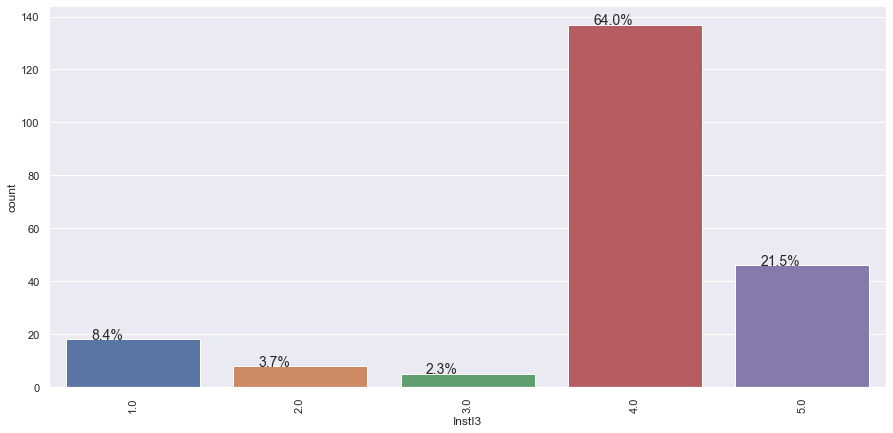

In [27]:
percentiled_bar(data.InstI3)

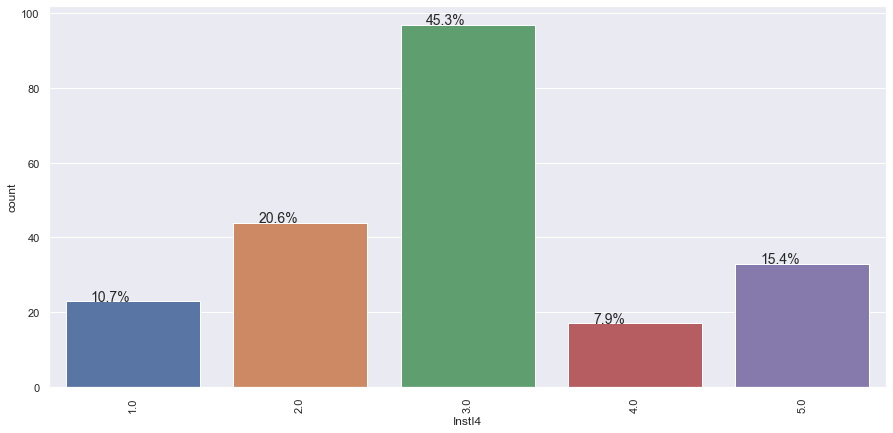

In [28]:
percentiled_bar(data.InstI4)

## SCG

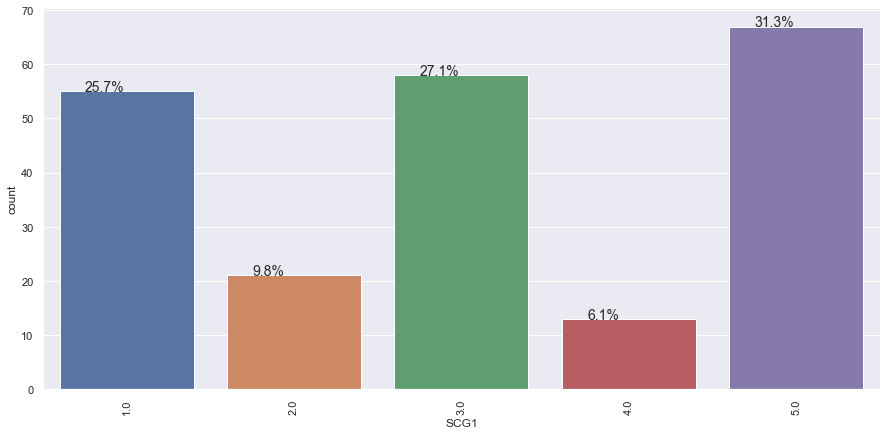

In [29]:
percentiled_bar(data.SCG1)

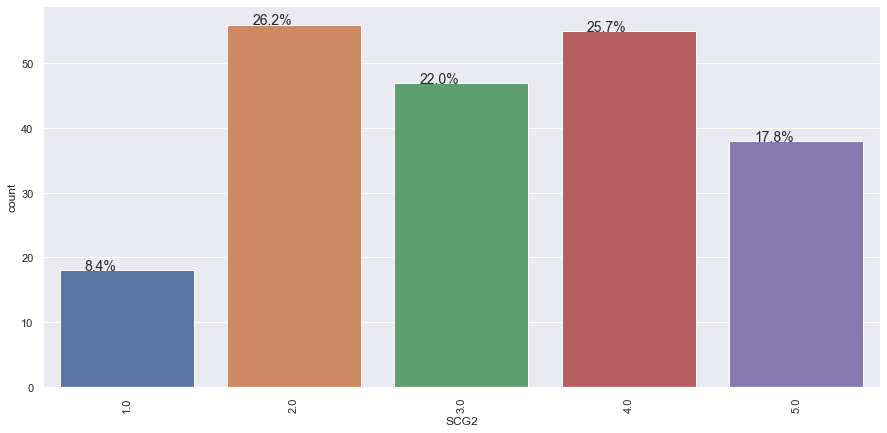

In [30]:
percentiled_bar(data.SCG2)

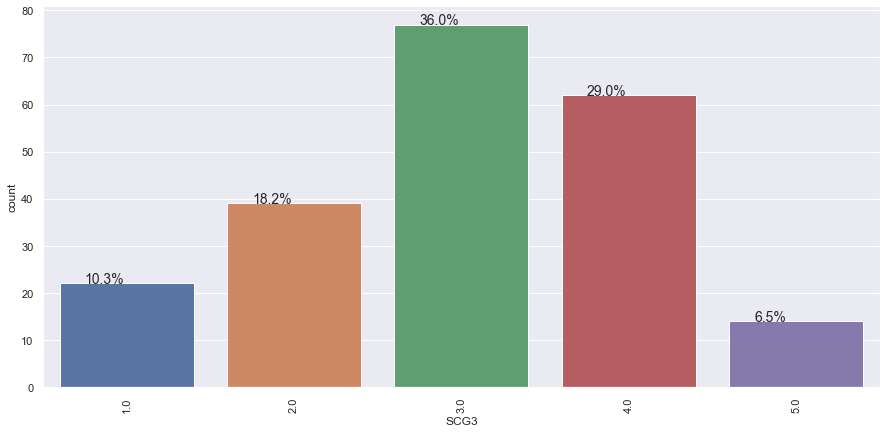

In [31]:
percentiled_bar(data.SCG3)

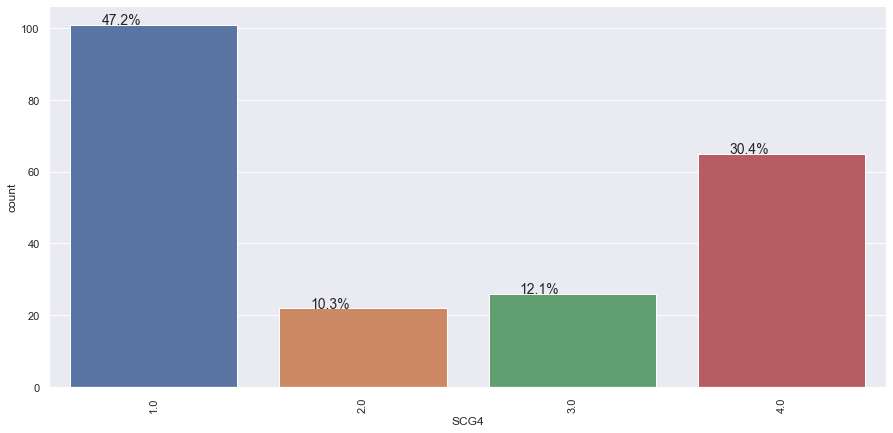

In [32]:
percentiled_bar(data.SCG4)

## SDM1

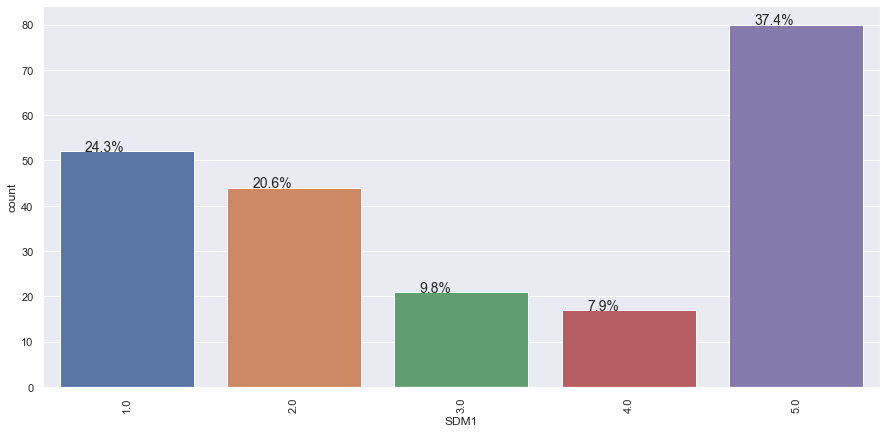

In [33]:
percentiled_bar(data.SDM1)

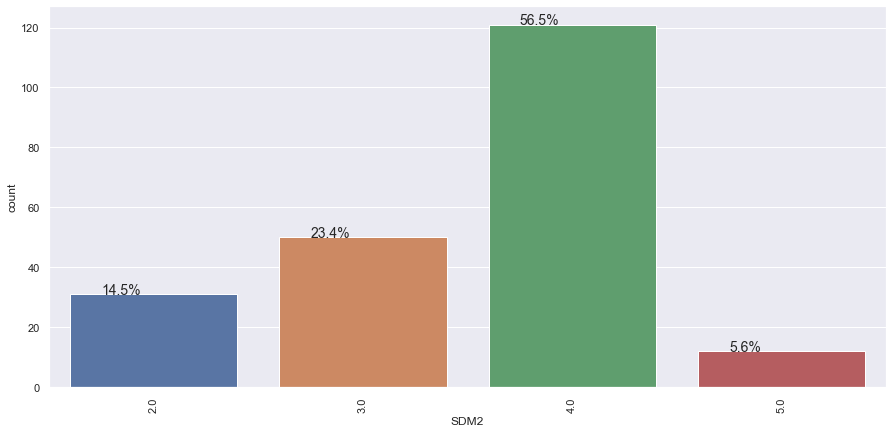

In [34]:
percentiled_bar(data.SDM2)

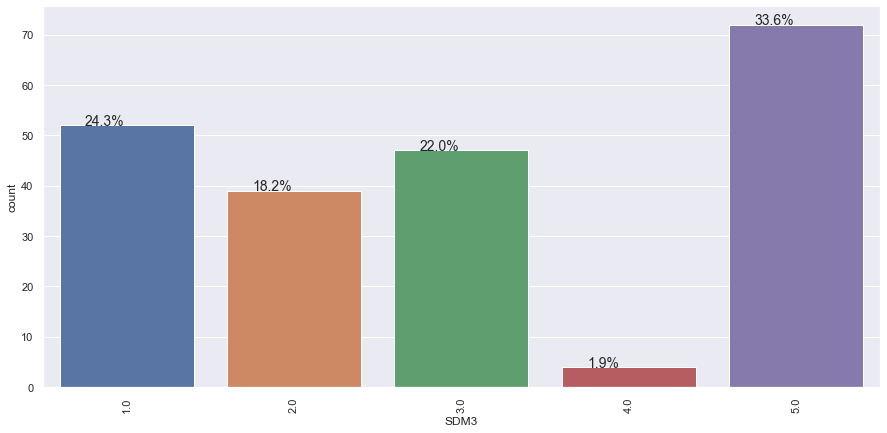

In [35]:
percentiled_bar(data.SDM3)

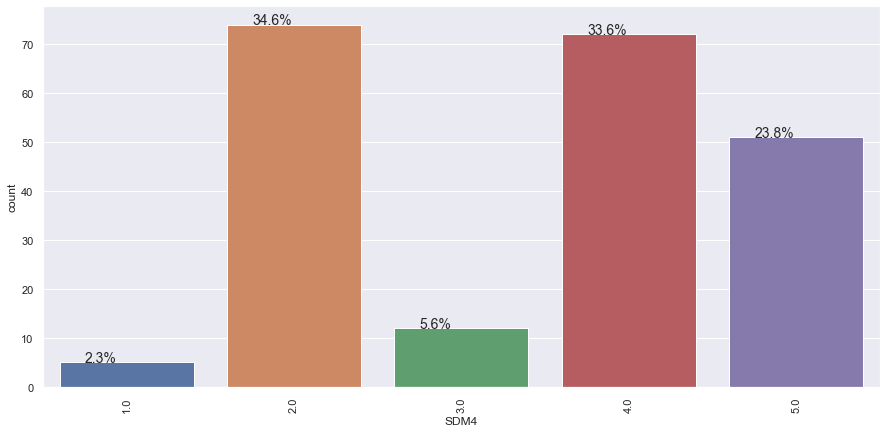

In [36]:
percentiled_bar(data.SDM4)

## SS

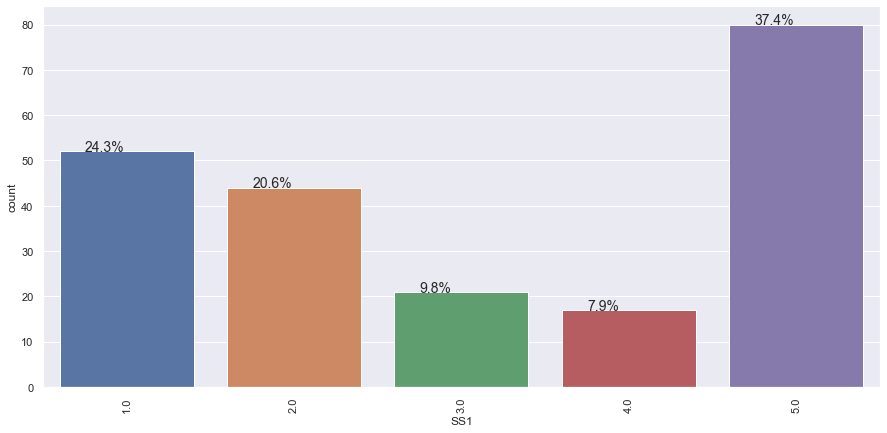

In [37]:
percentiled_bar(data.SS1)

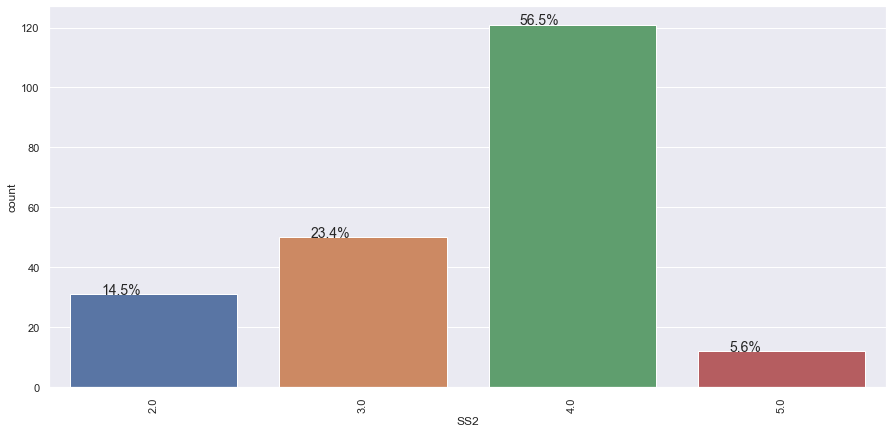

In [38]:
percentiled_bar(data.SS2)

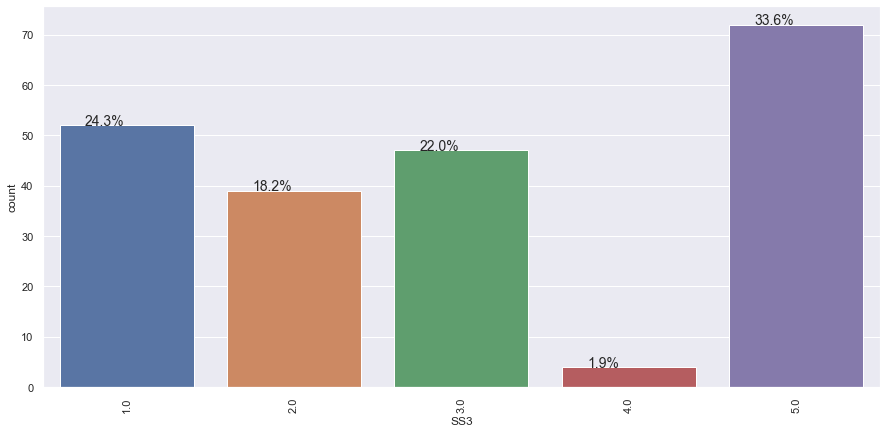

In [39]:
percentiled_bar(data.SS3)

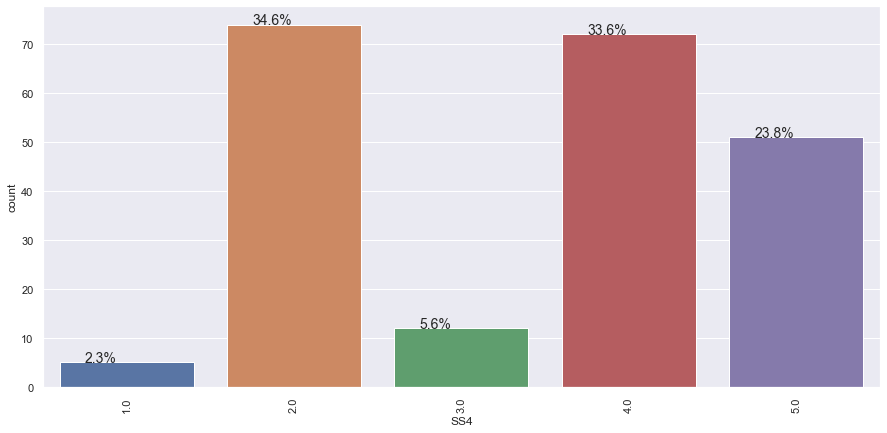

In [40]:
percentiled_bar(data.SS4)

## TI

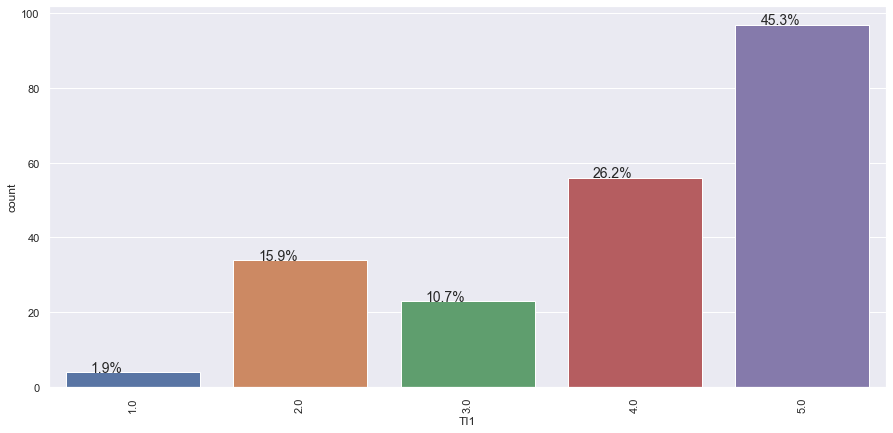

In [41]:
percentiled_bar(data.TI1)

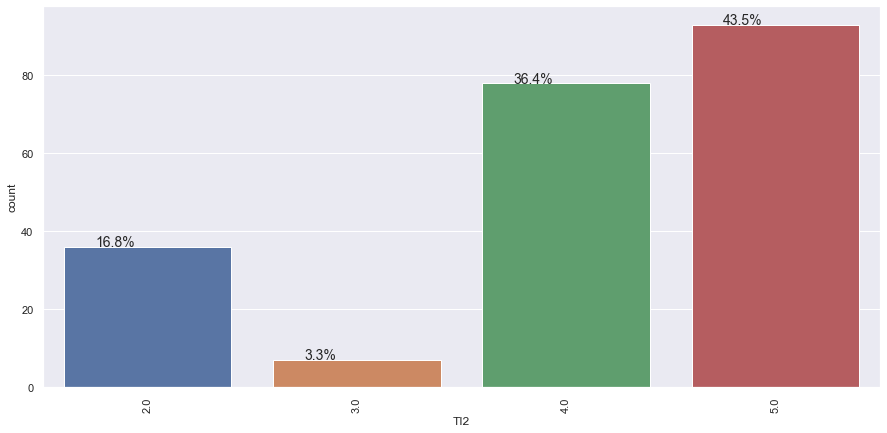

In [42]:
percentiled_bar(data.TI2)

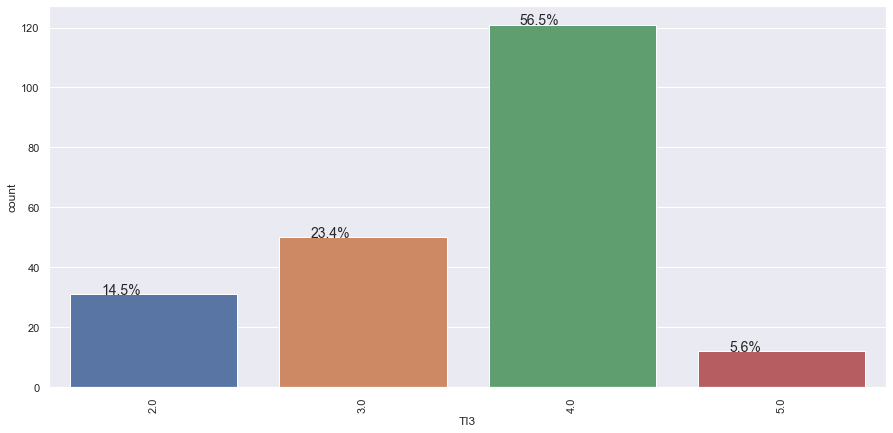

In [43]:
percentiled_bar(data.TI3)

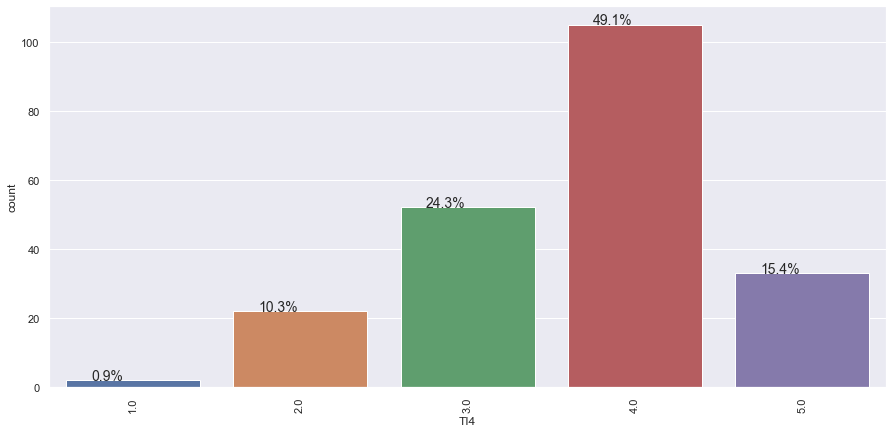

In [44]:
percentiled_bar(data.TI4)

## Bivariate Analaysis 

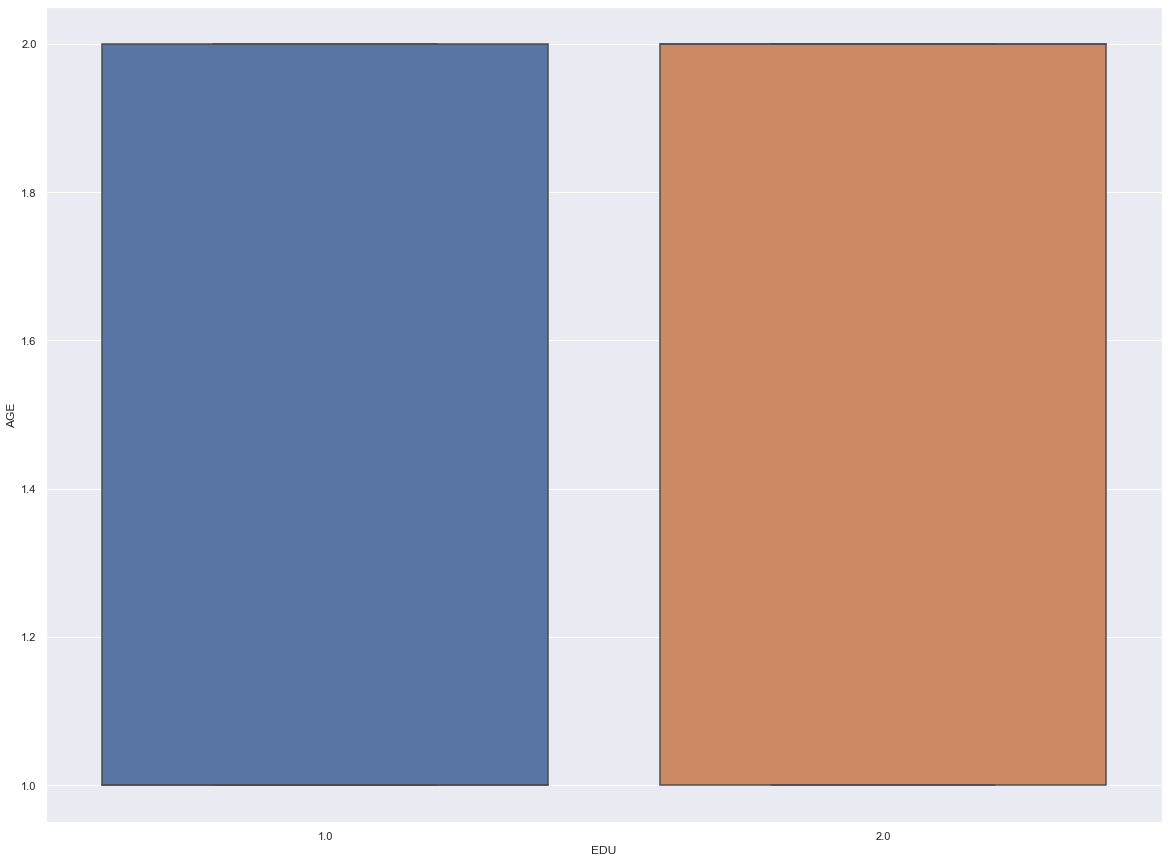

In [45]:
#EDU v AGE v CR1
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.AGE)
plt.show()

### Observation:
* we note that there is no difference in education by age or visa versa

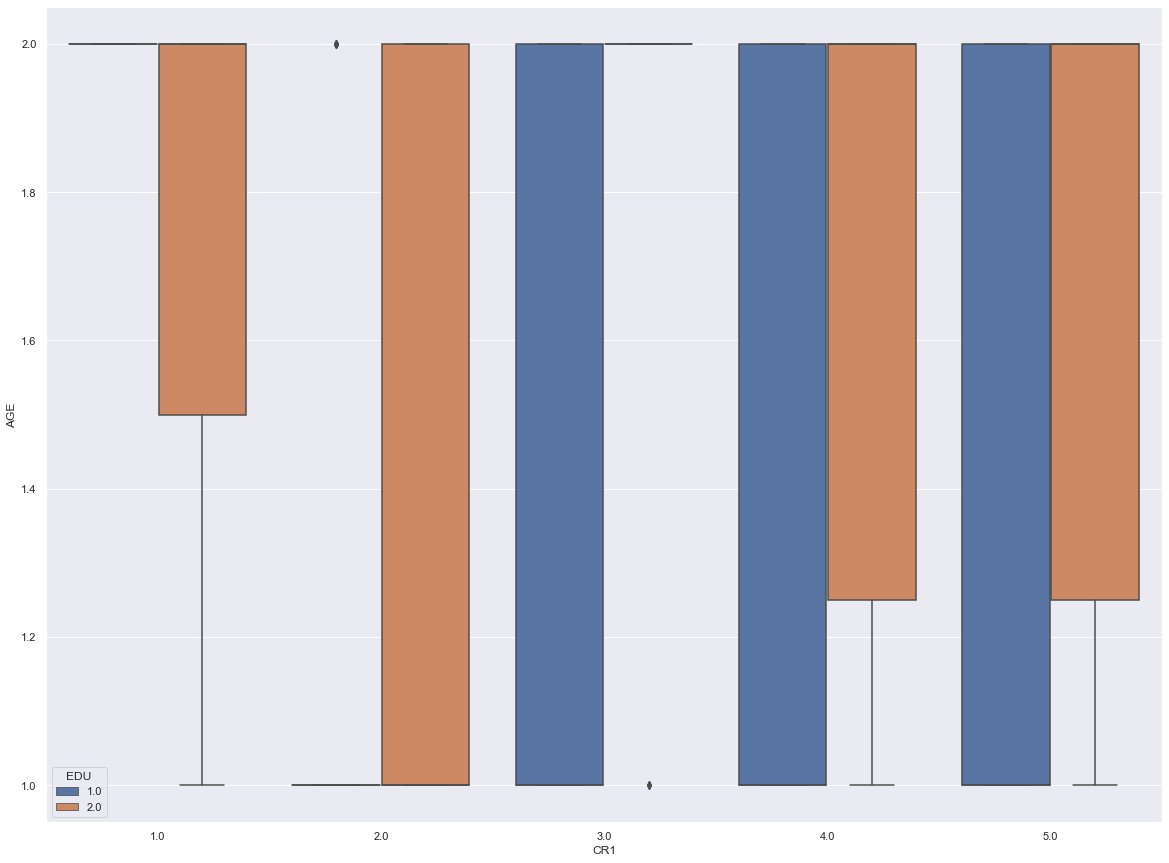

In [46]:
#EDU v AGE v CR1
plt.figure(figsize=(20,15))
sns.boxplot(data.CR1, data.AGE, hue= data.EDU)
plt.show()

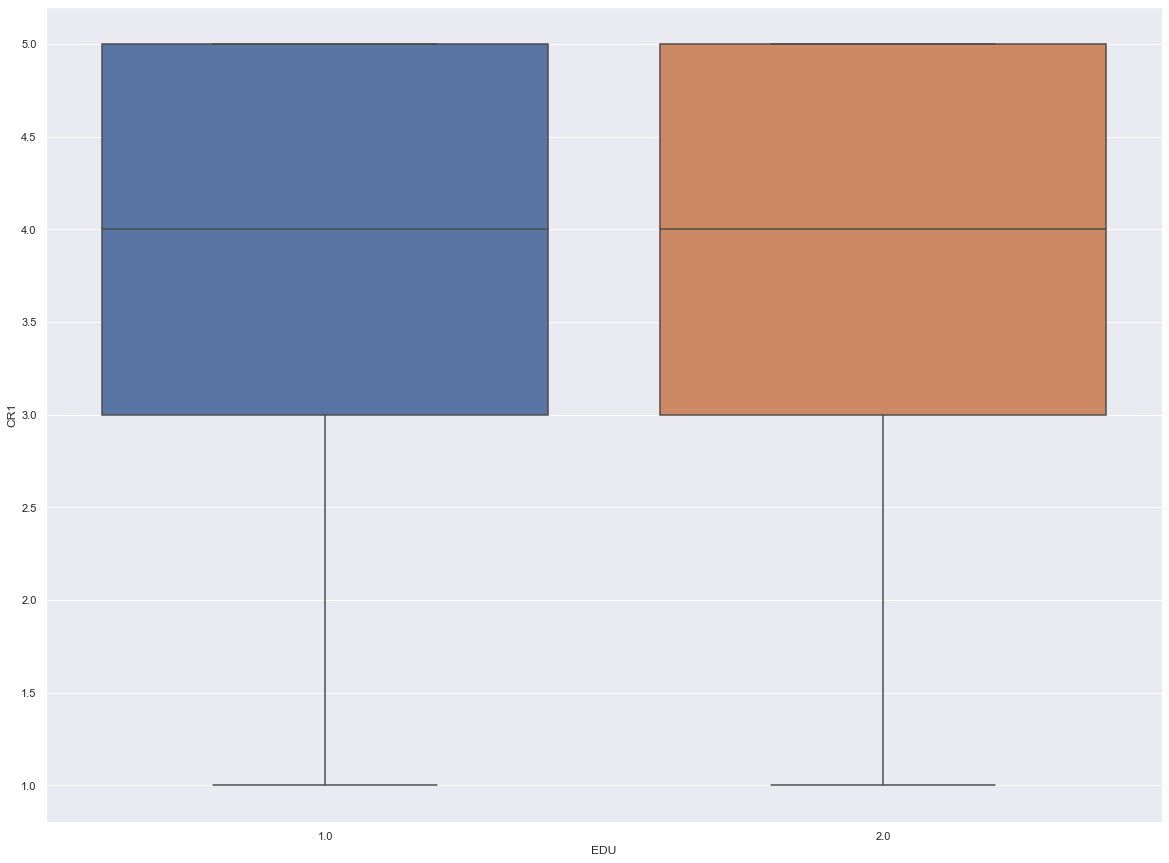

In [47]:
#EDU v CR1
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.CR1)
plt.show()

* We observe that within CR1 there is no variance between crime and education

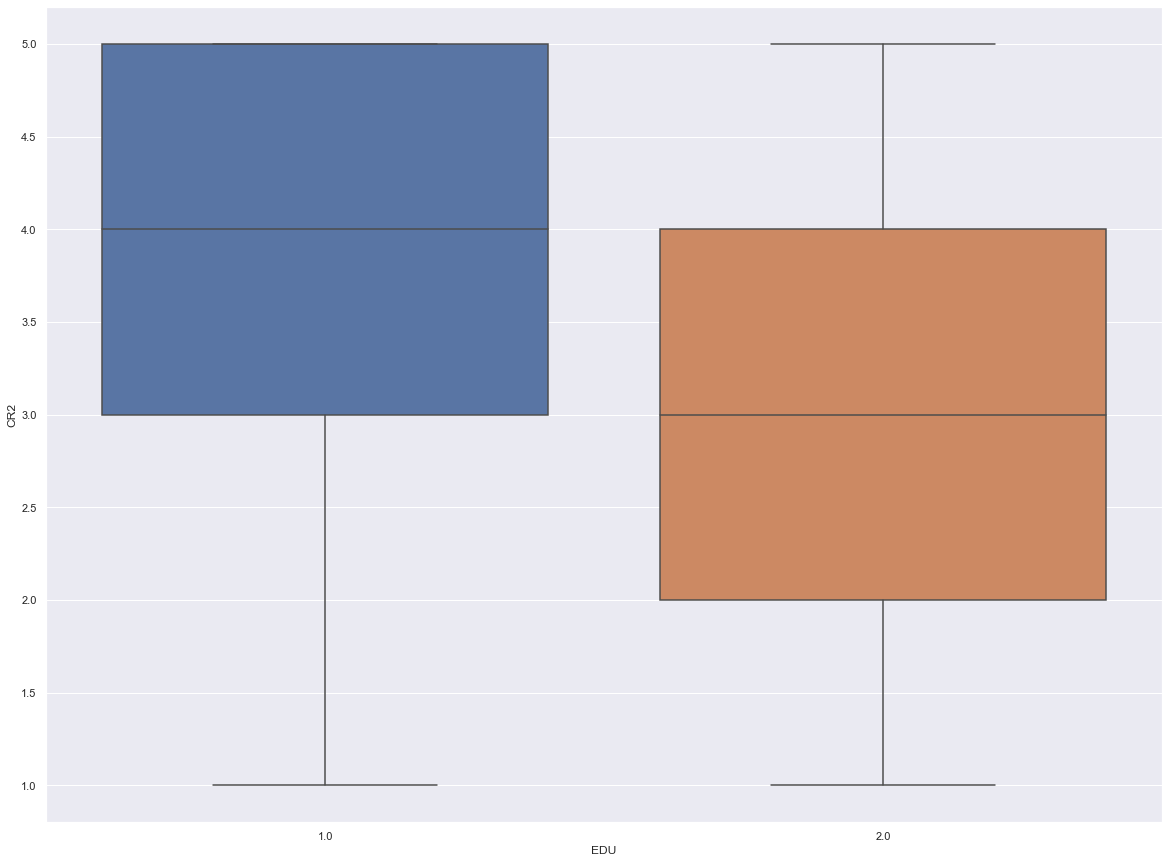

In [48]:
#EDU v AGE 
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.CR2)
plt.show()

* Important: within CR2: Lower education has a higher median crime distribution

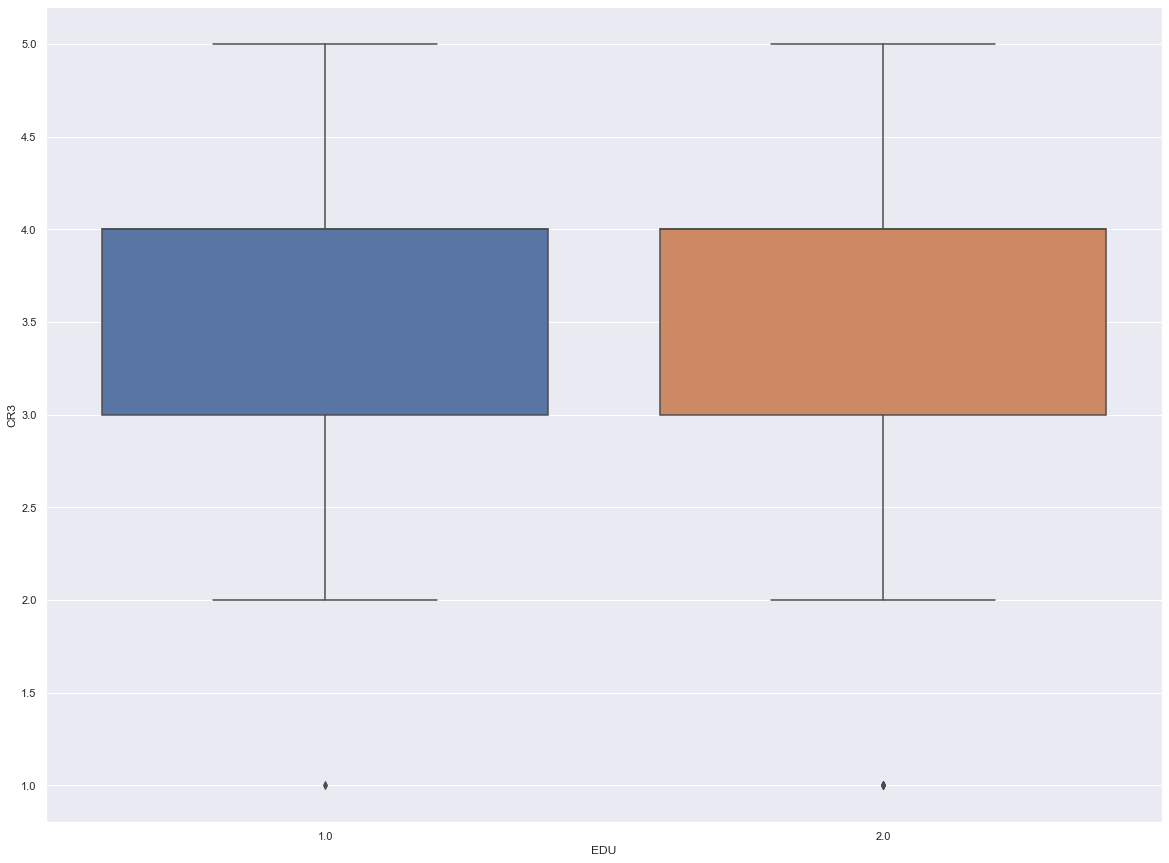

In [49]:
#EDU v AGE 
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.CR3)
plt.show()

* We observe that within CR1 there is no variance between crime and education

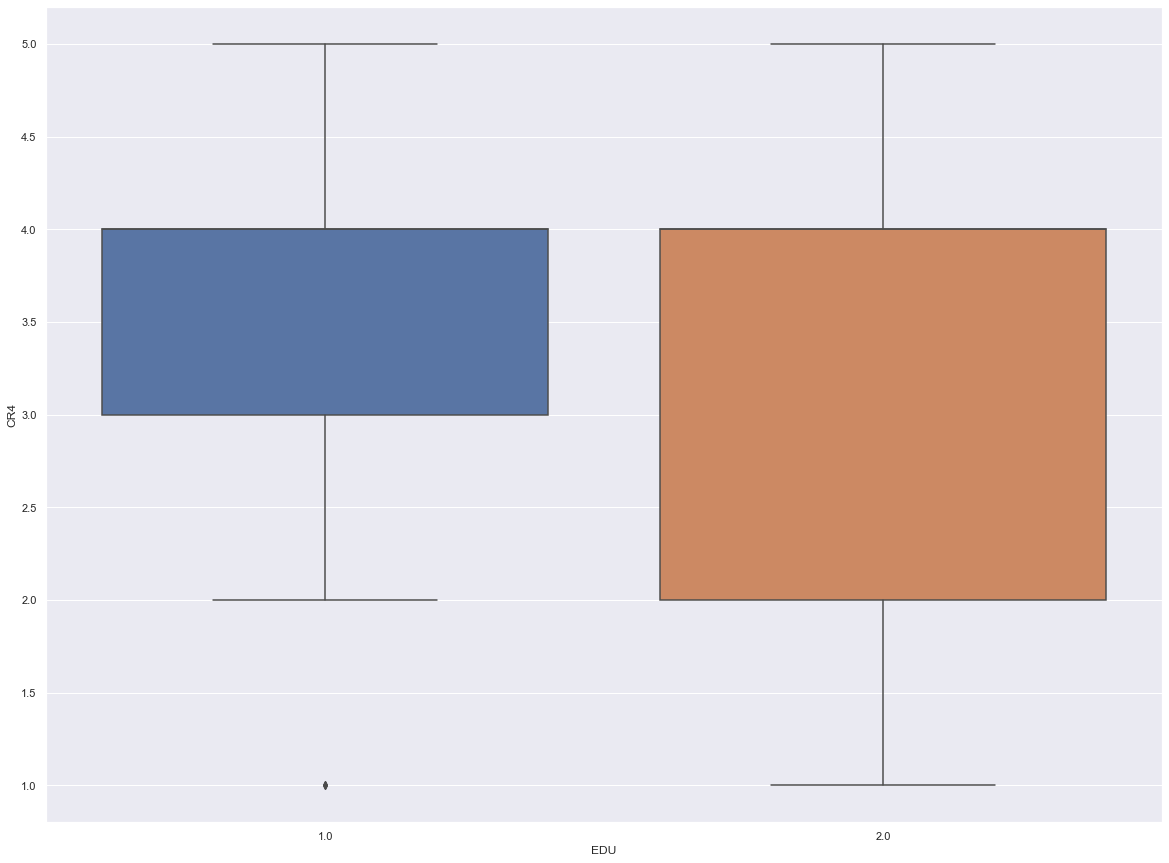

In [50]:
#EDU v AGE 
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.CR4)
plt.show()

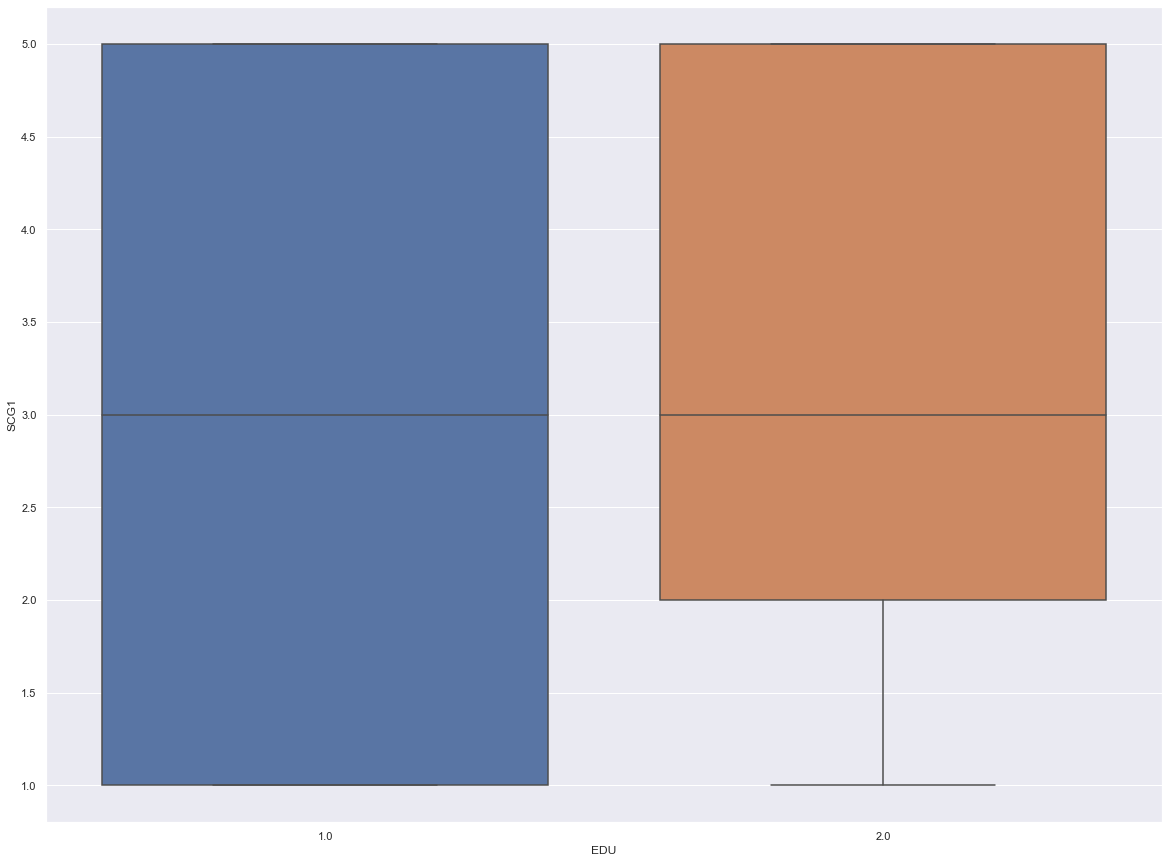

In [51]:
#EDU v SCG1
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.SCG1)
plt.show()

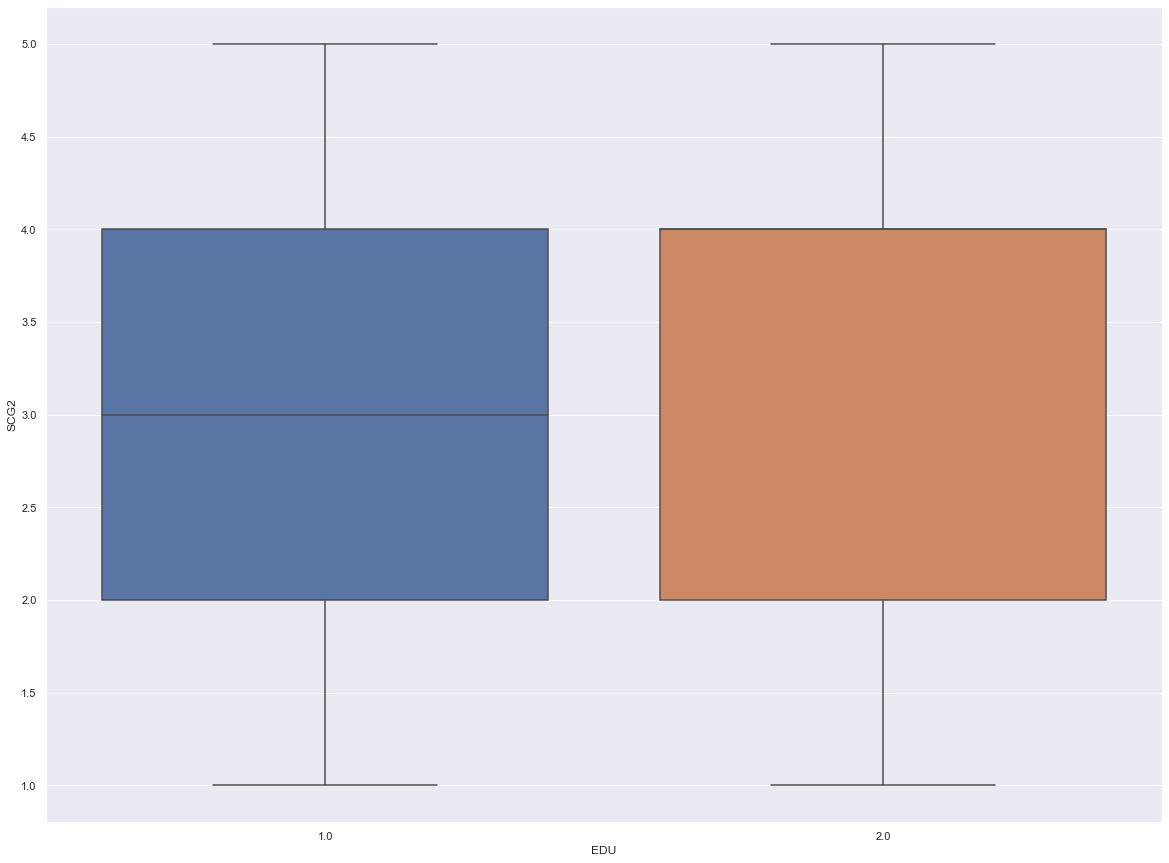

In [52]:
#EDU v SCG2
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.SCG2)
plt.show()

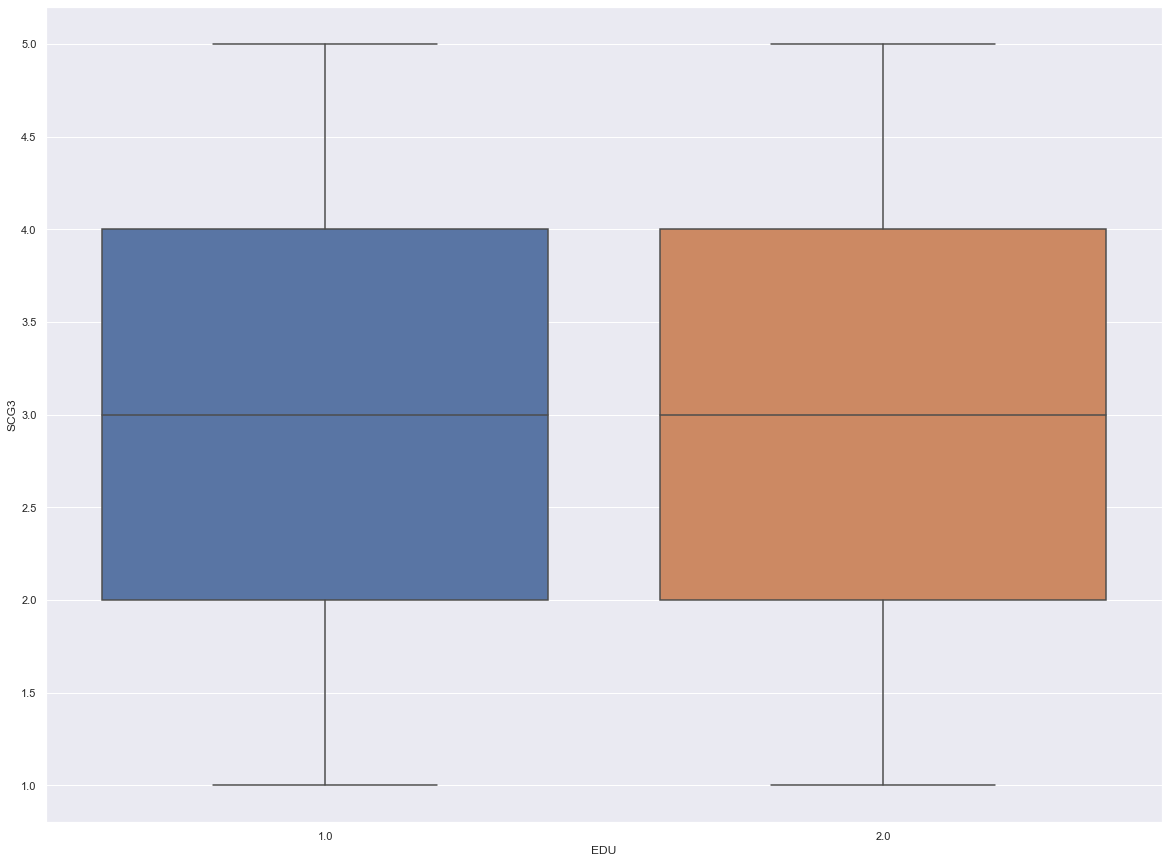

In [53]:
#EDU v SCG1
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.SCG3)
plt.show()

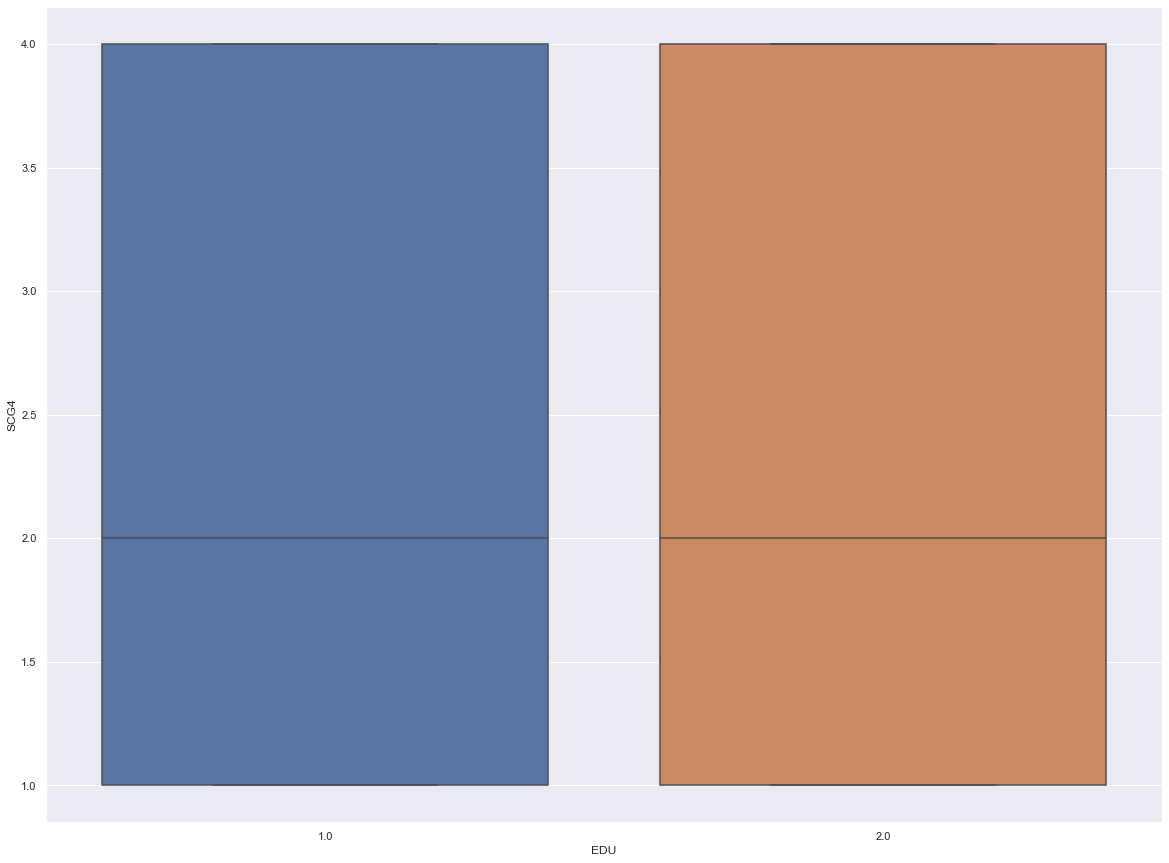

In [54]:
#EDU v SCG1
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.SCG4)
plt.show()

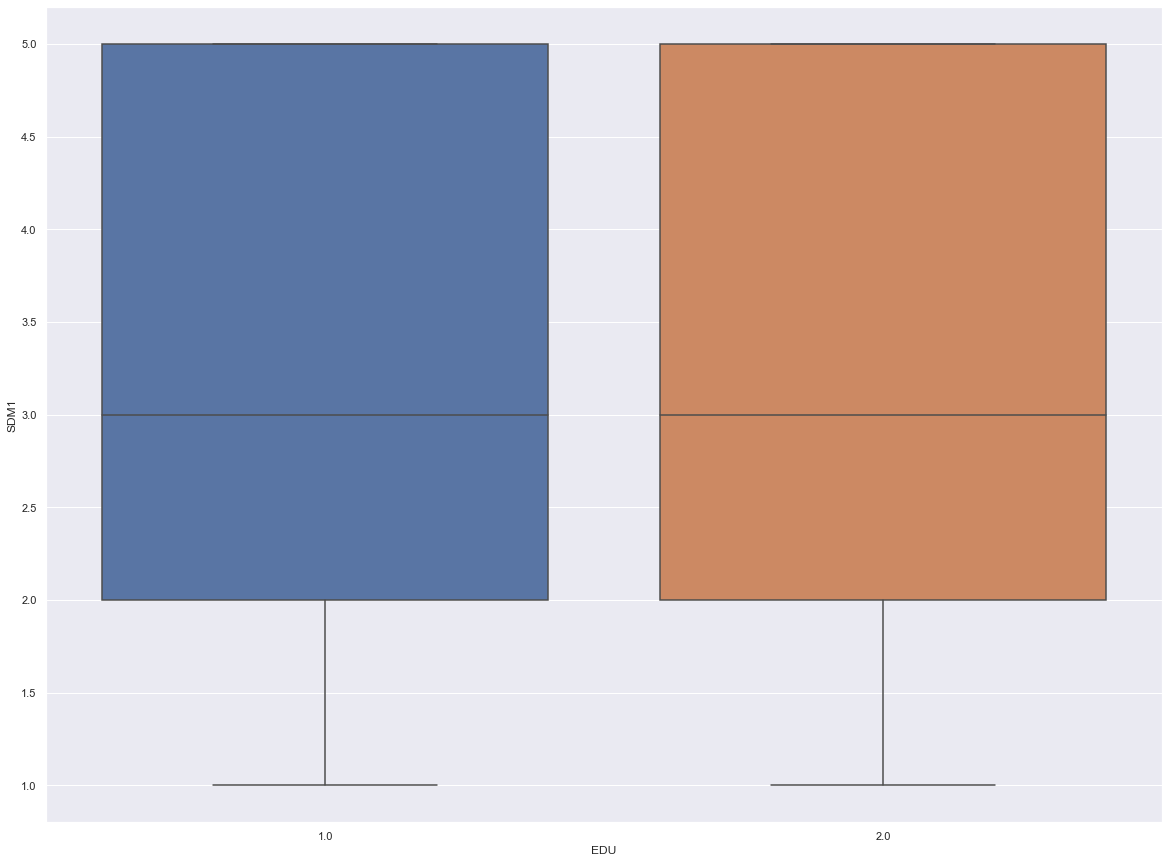

In [55]:
#EDU v SDM1
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.SDM1)
plt.show()

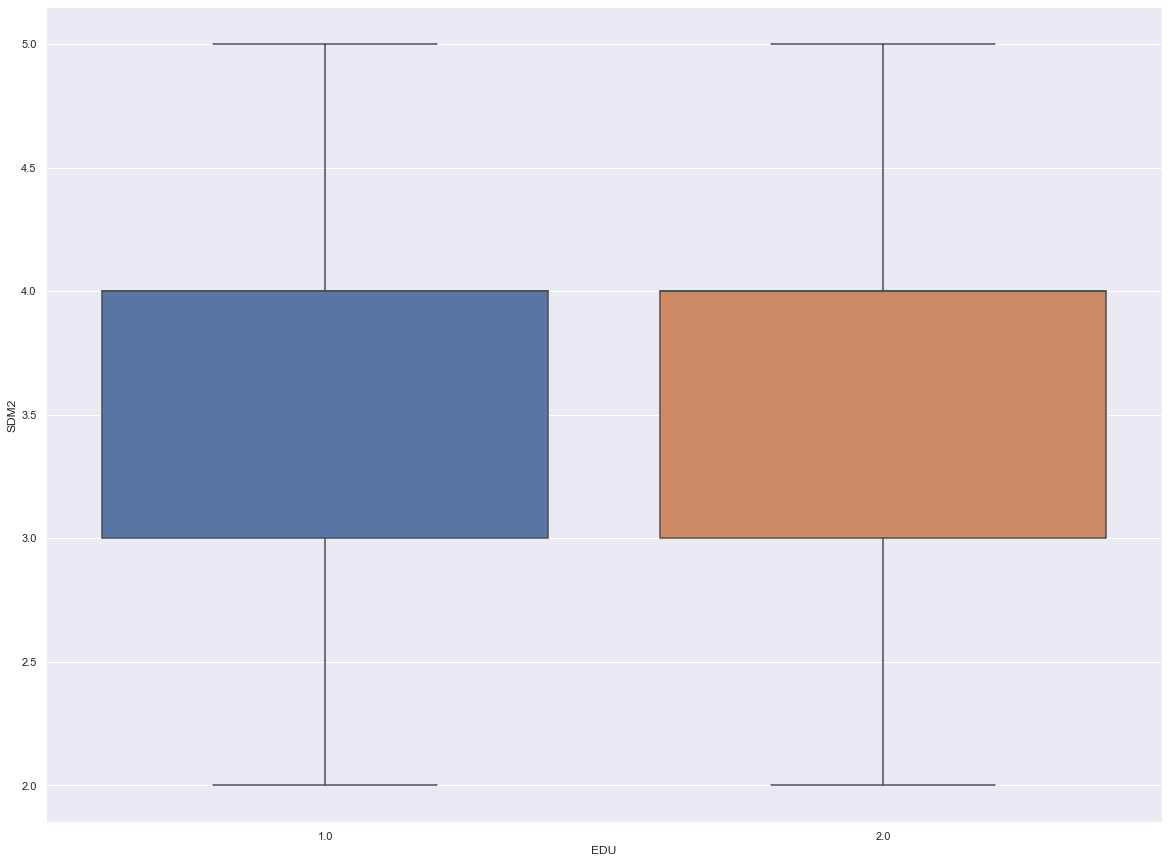

In [56]:
#EDU v SDM2
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.SDM2)
plt.show()

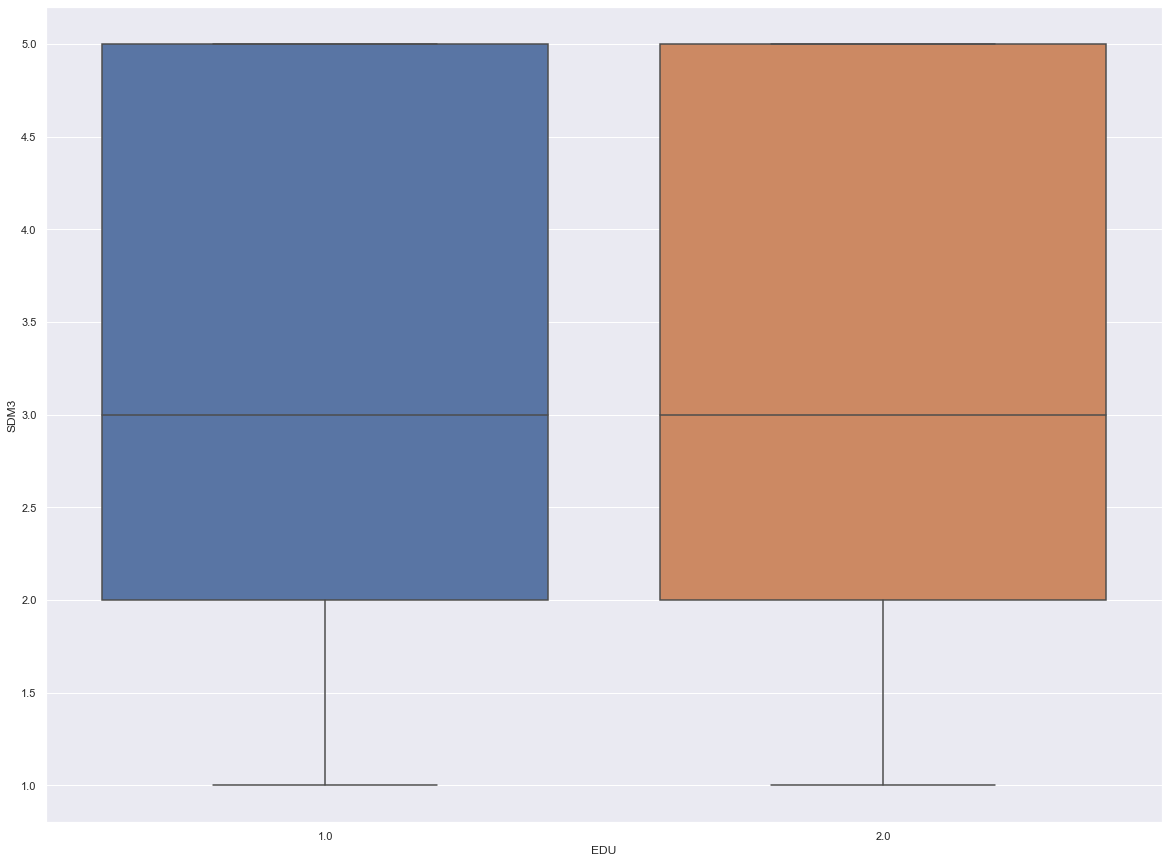

In [57]:
#EDU v SDM3
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.SDM3)
plt.show()

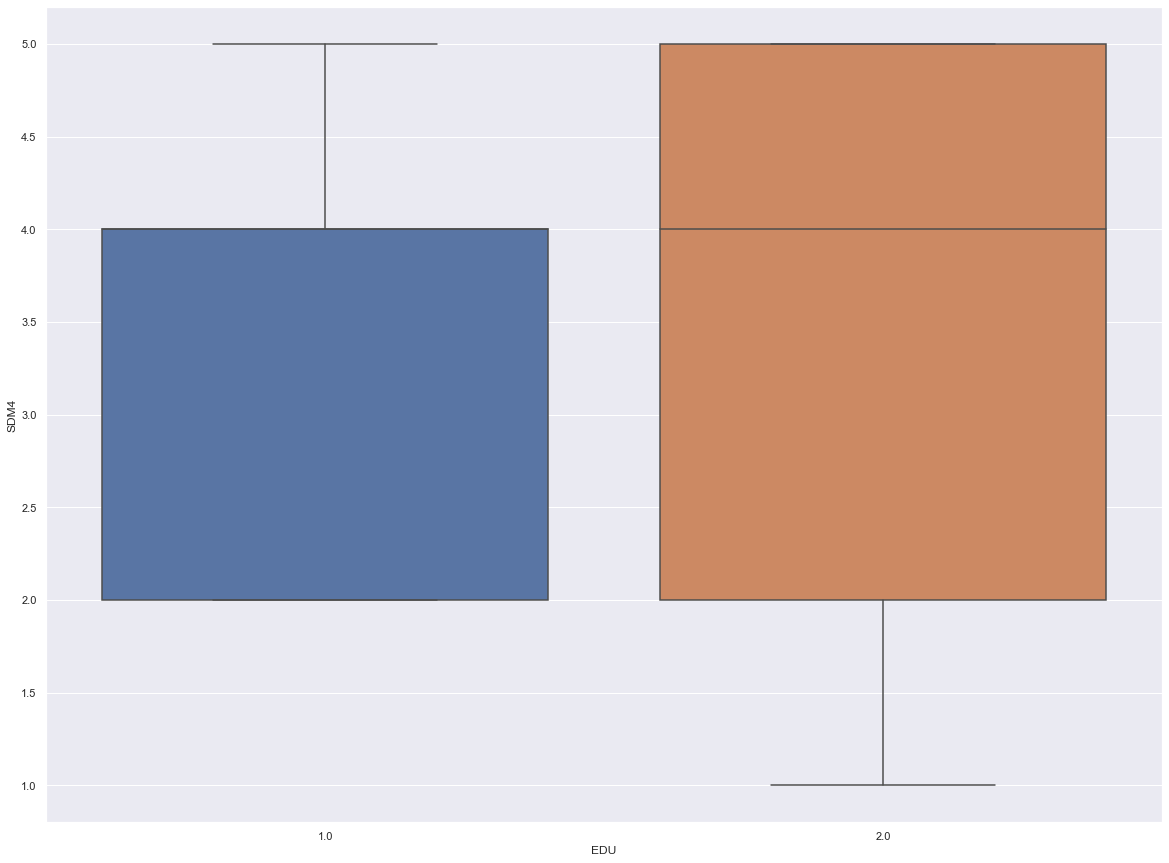

In [58]:
#EDU v SDM3
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.SDM4)
plt.show()

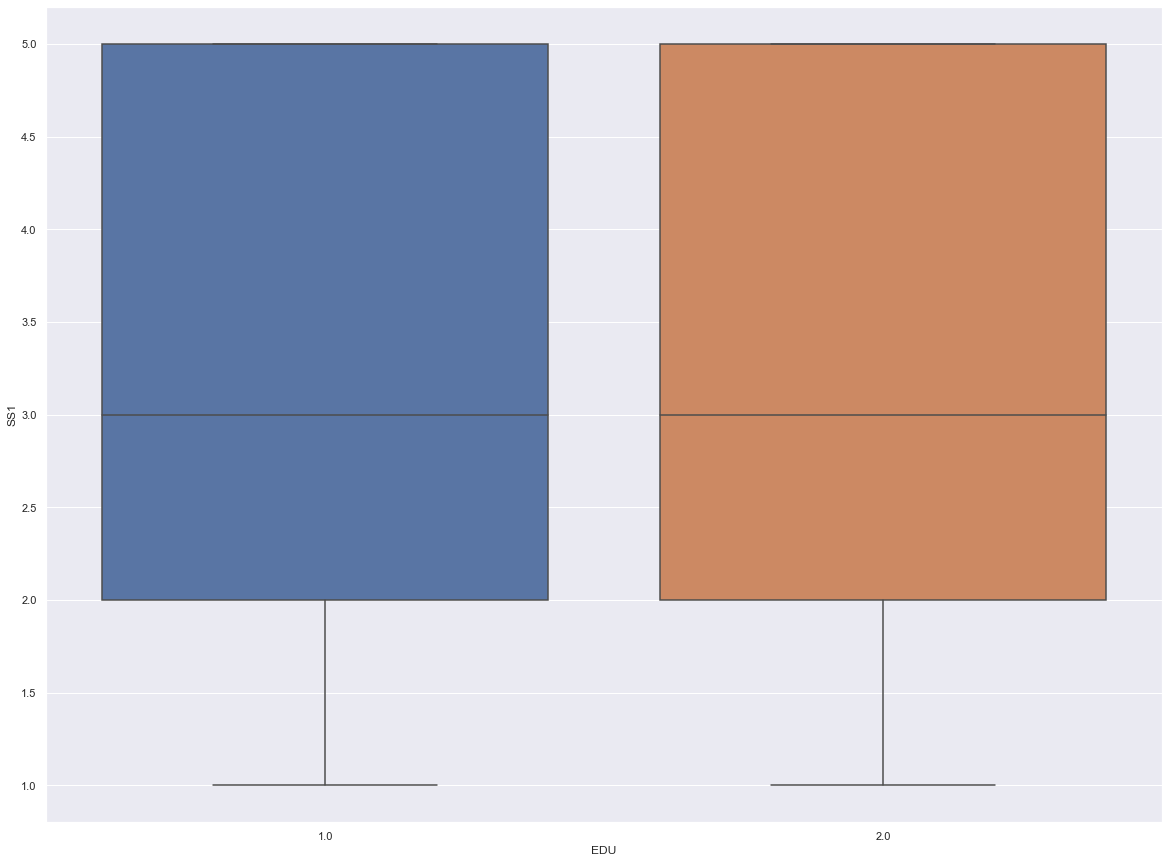

In [59]:
#EDU v SS1
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.SS1)
plt.show()

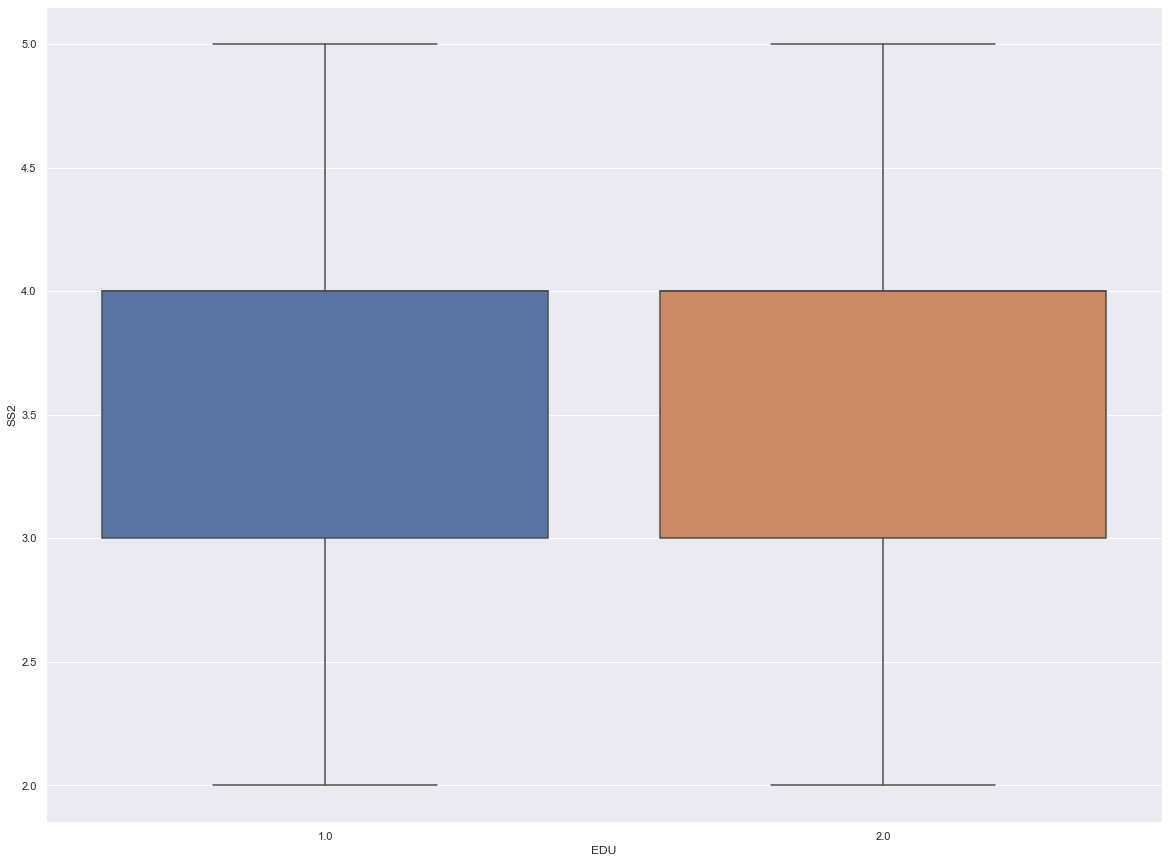

In [60]:
#EDU v SS1
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.SS2)
plt.show()

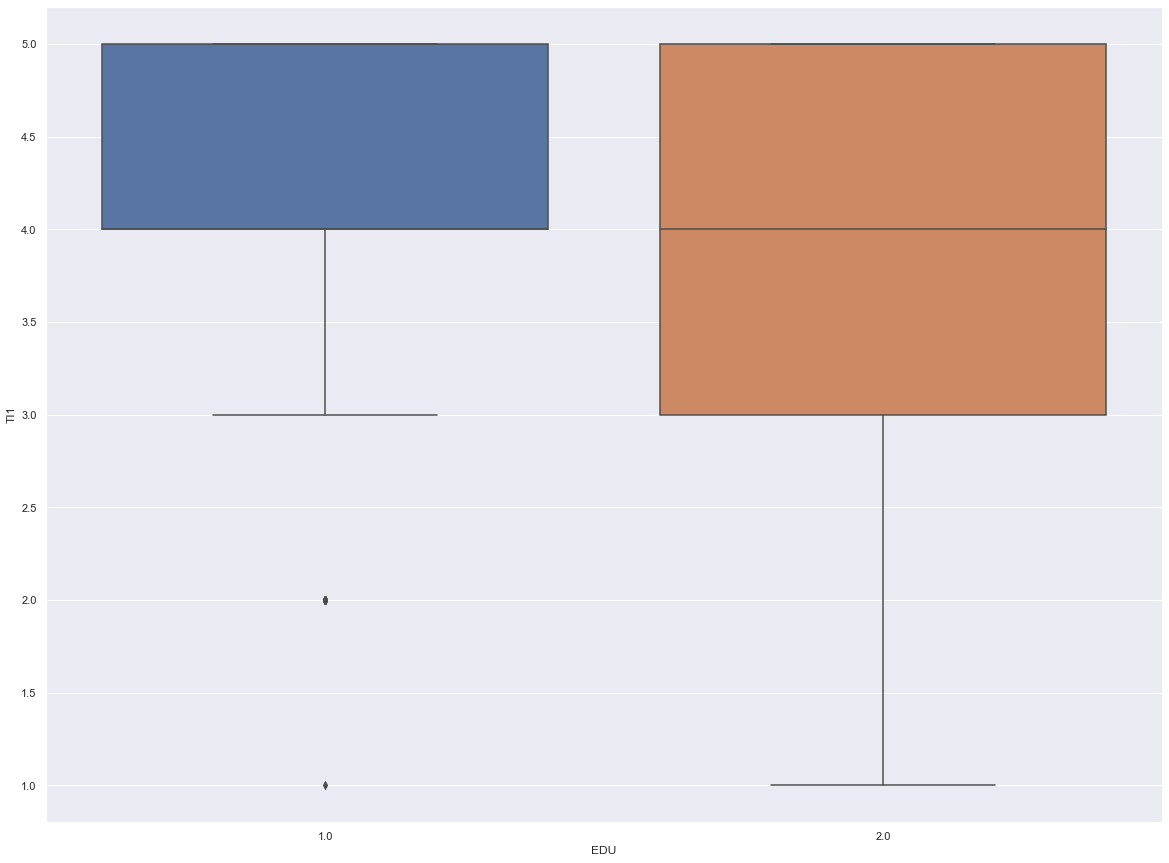

In [61]:
#EDU v T
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.TI1)
plt.show()

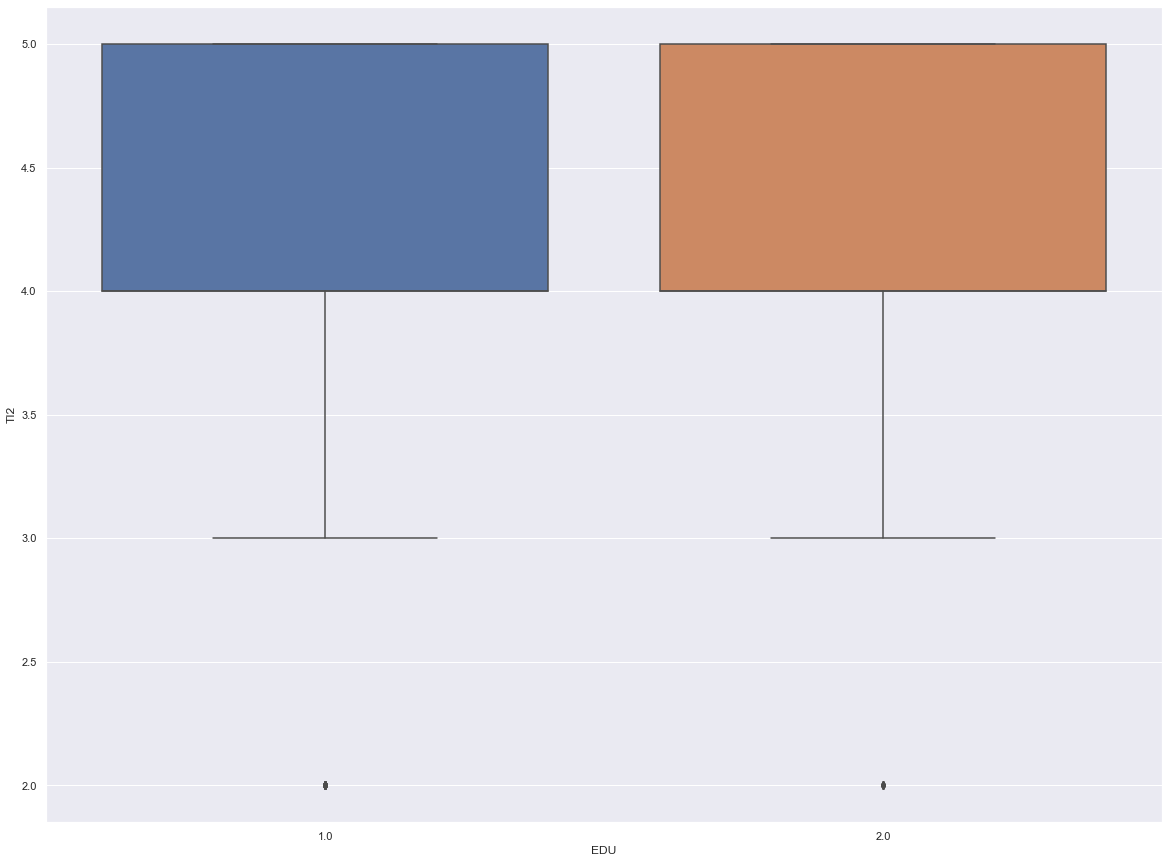

In [62]:
#EDU v T
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.TI2)
plt.show()

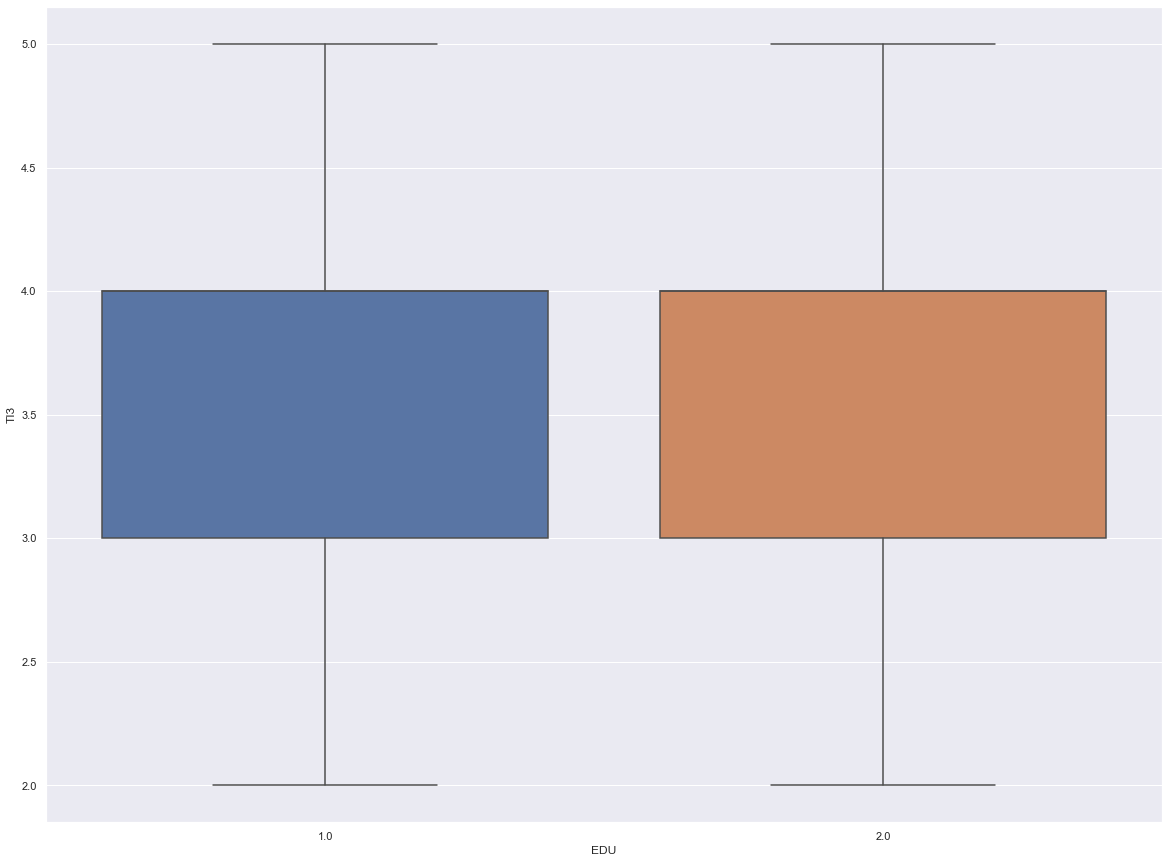

In [63]:
#EDU v T
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.TI3)
plt.show()

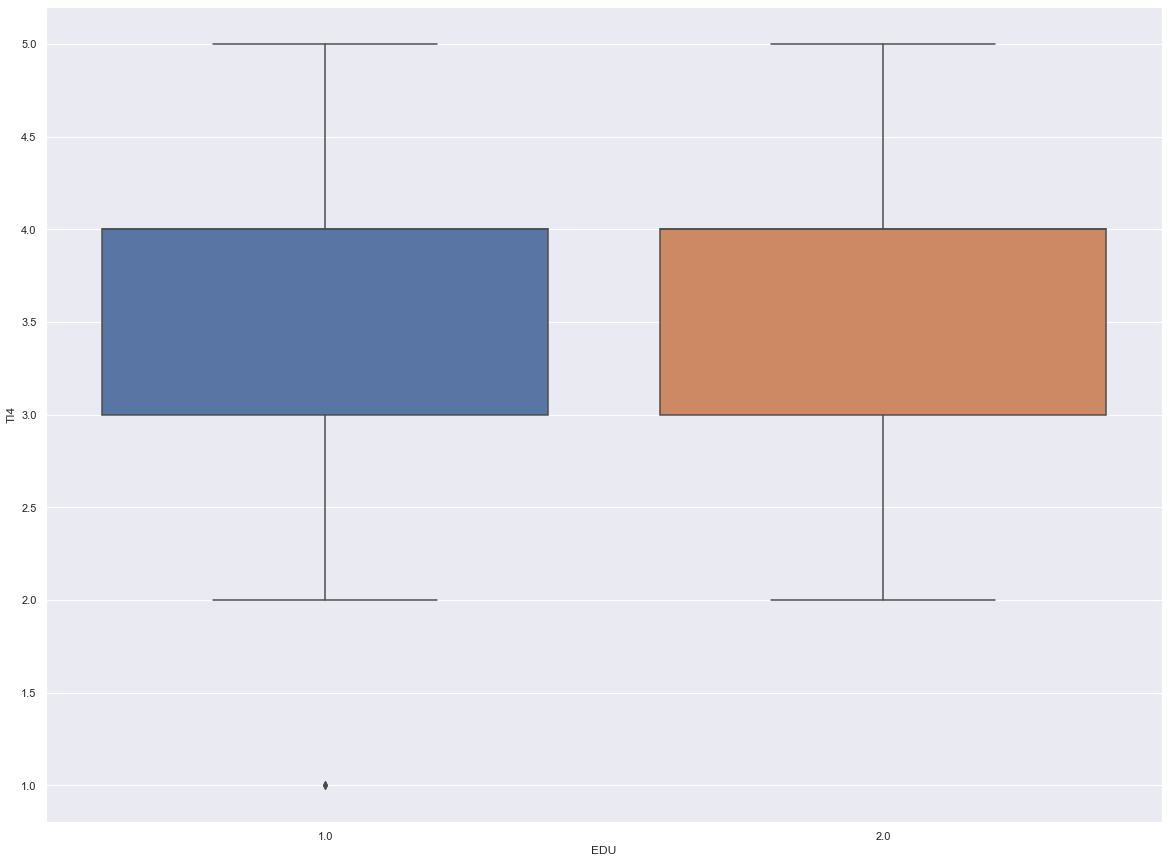

In [64]:
#EDU v T
plt.figure(figsize=(20,15))
sns.boxplot(data.EDU, data.TI4)
plt.show()

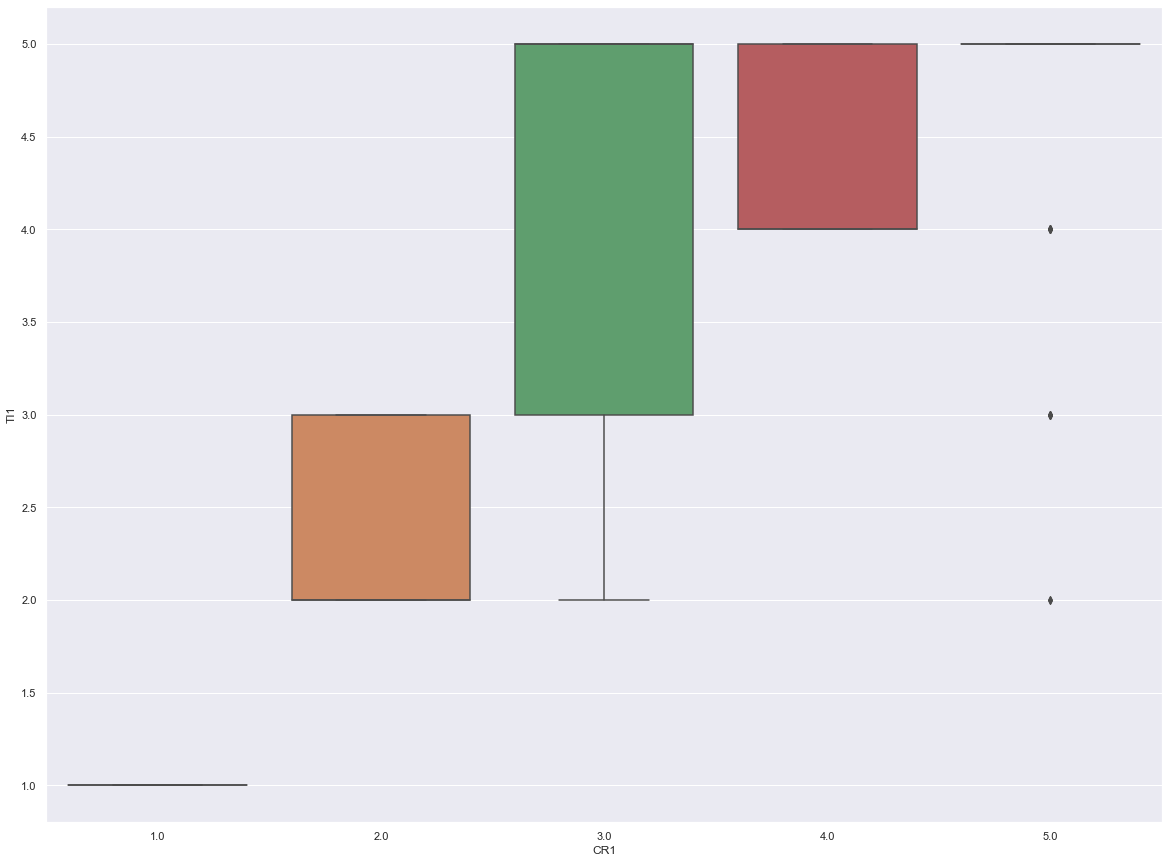

In [65]:
#EDU v T
plt.figure(figsize=(20,15))
sns.boxplot(data.CR1, data.TI1)
plt.show()

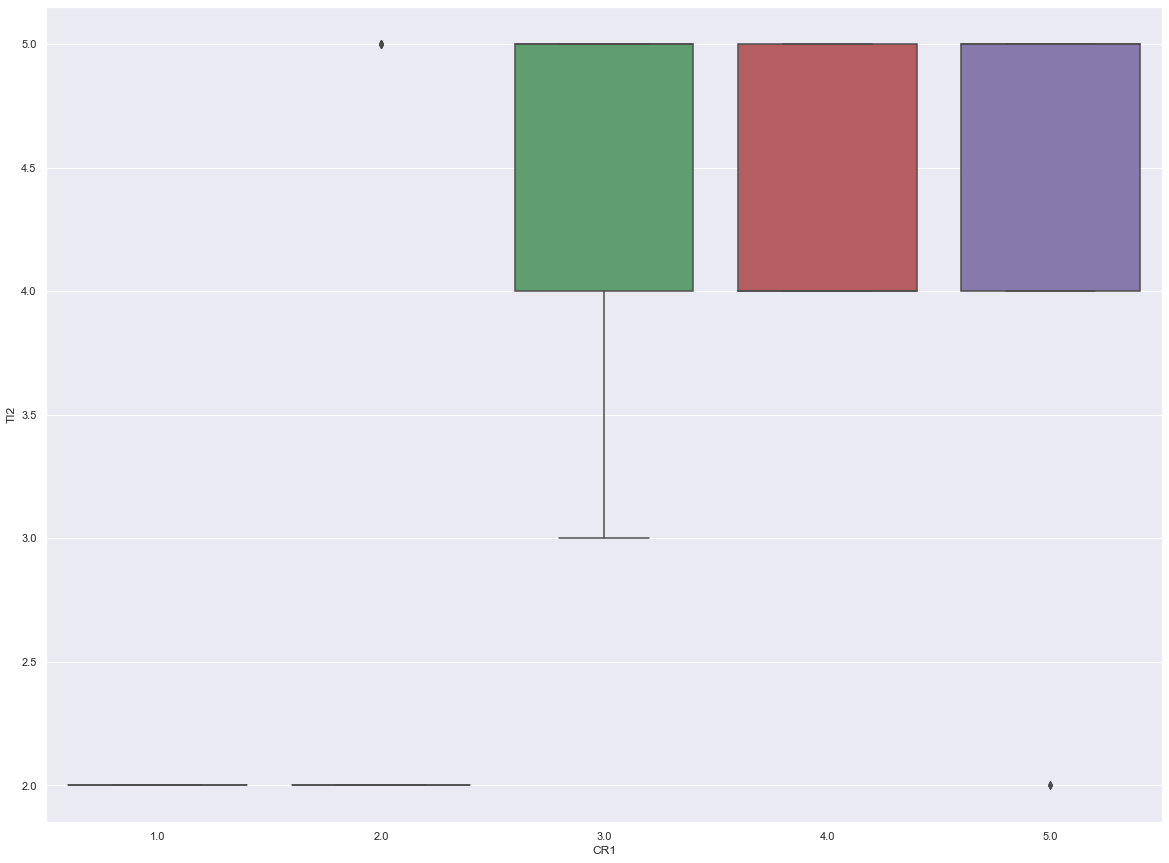

In [66]:
#EDU v T
plt.figure(figsize=(20,15))
sns.boxplot(data.CR1, data.TI2)
plt.show()

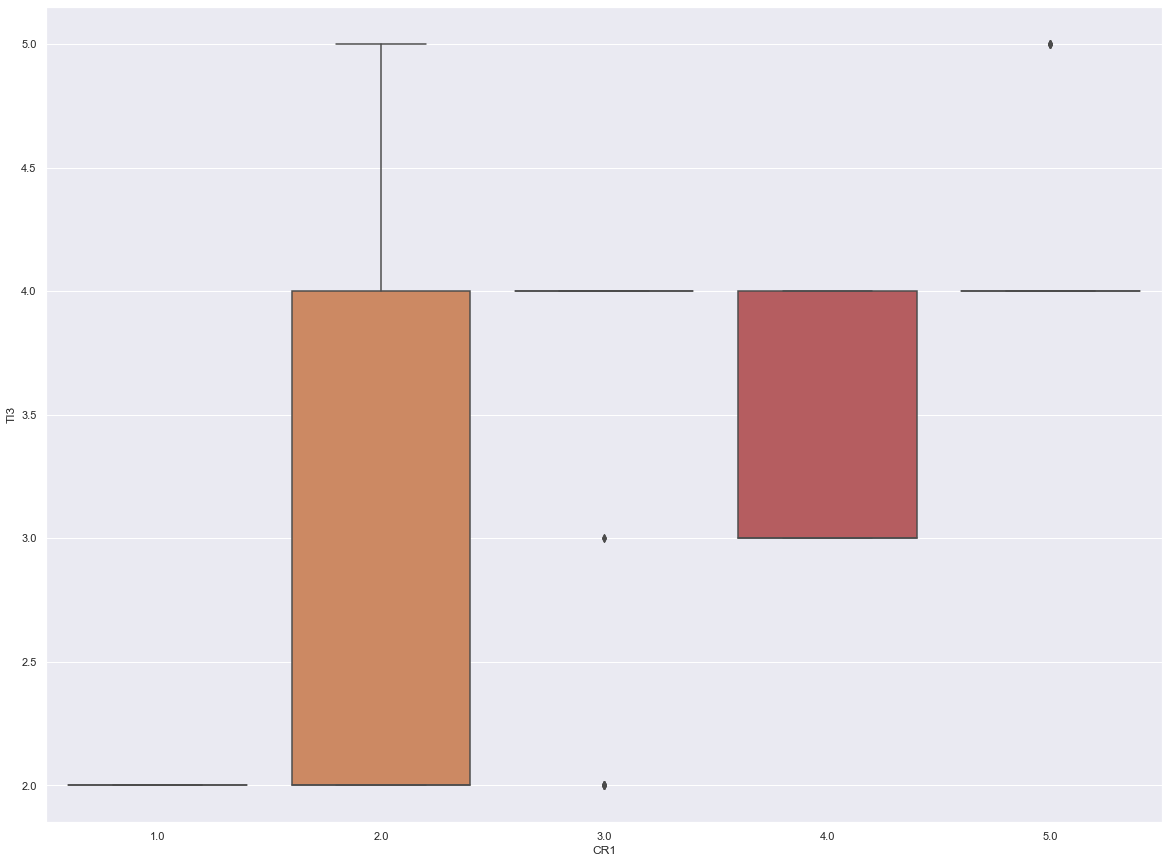

In [67]:
#EDU v T
plt.figure(figsize=(20,15))
sns.boxplot(data.CR1, data.TI3)
plt.show()

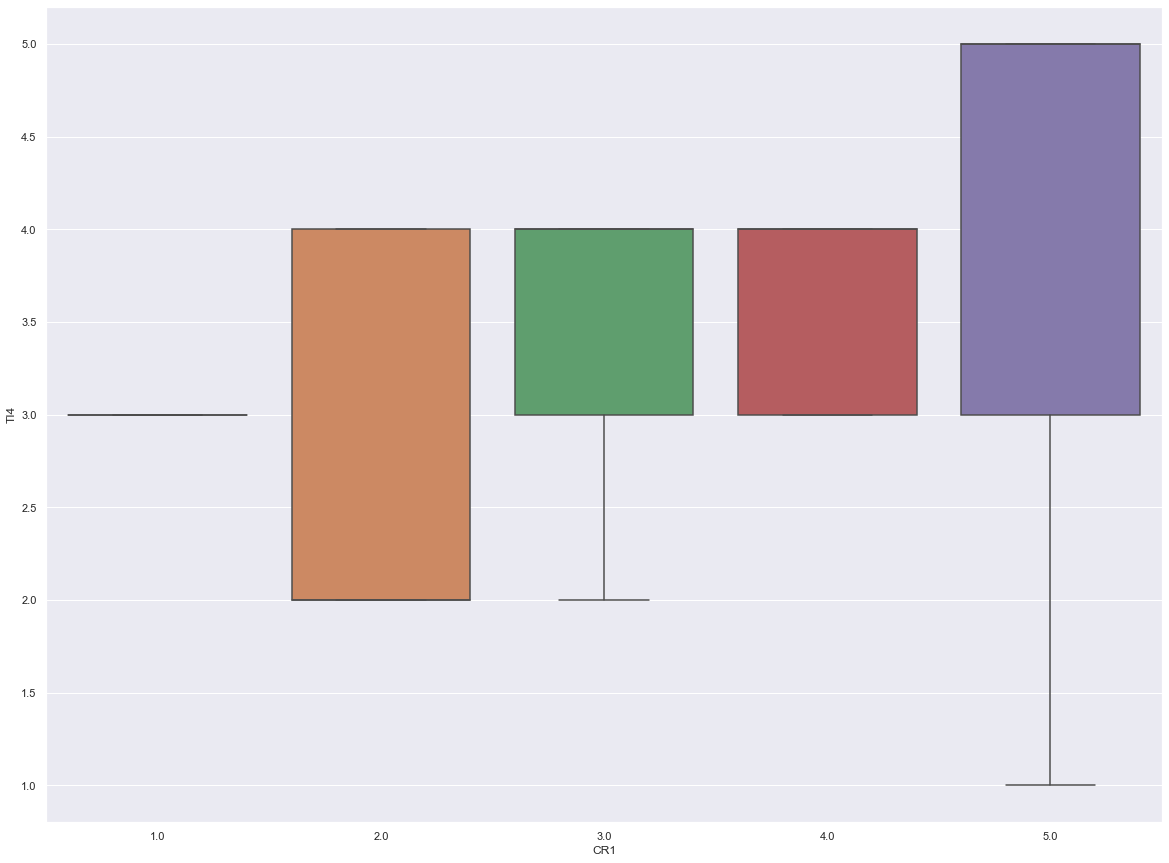

In [68]:
#EDU v T
plt.figure(figsize=(20,15))
sns.boxplot(data.CR1, data.TI4)
plt.show()

## Multivariate Analaysis

<Figure size 1080x1440 with 0 Axes>

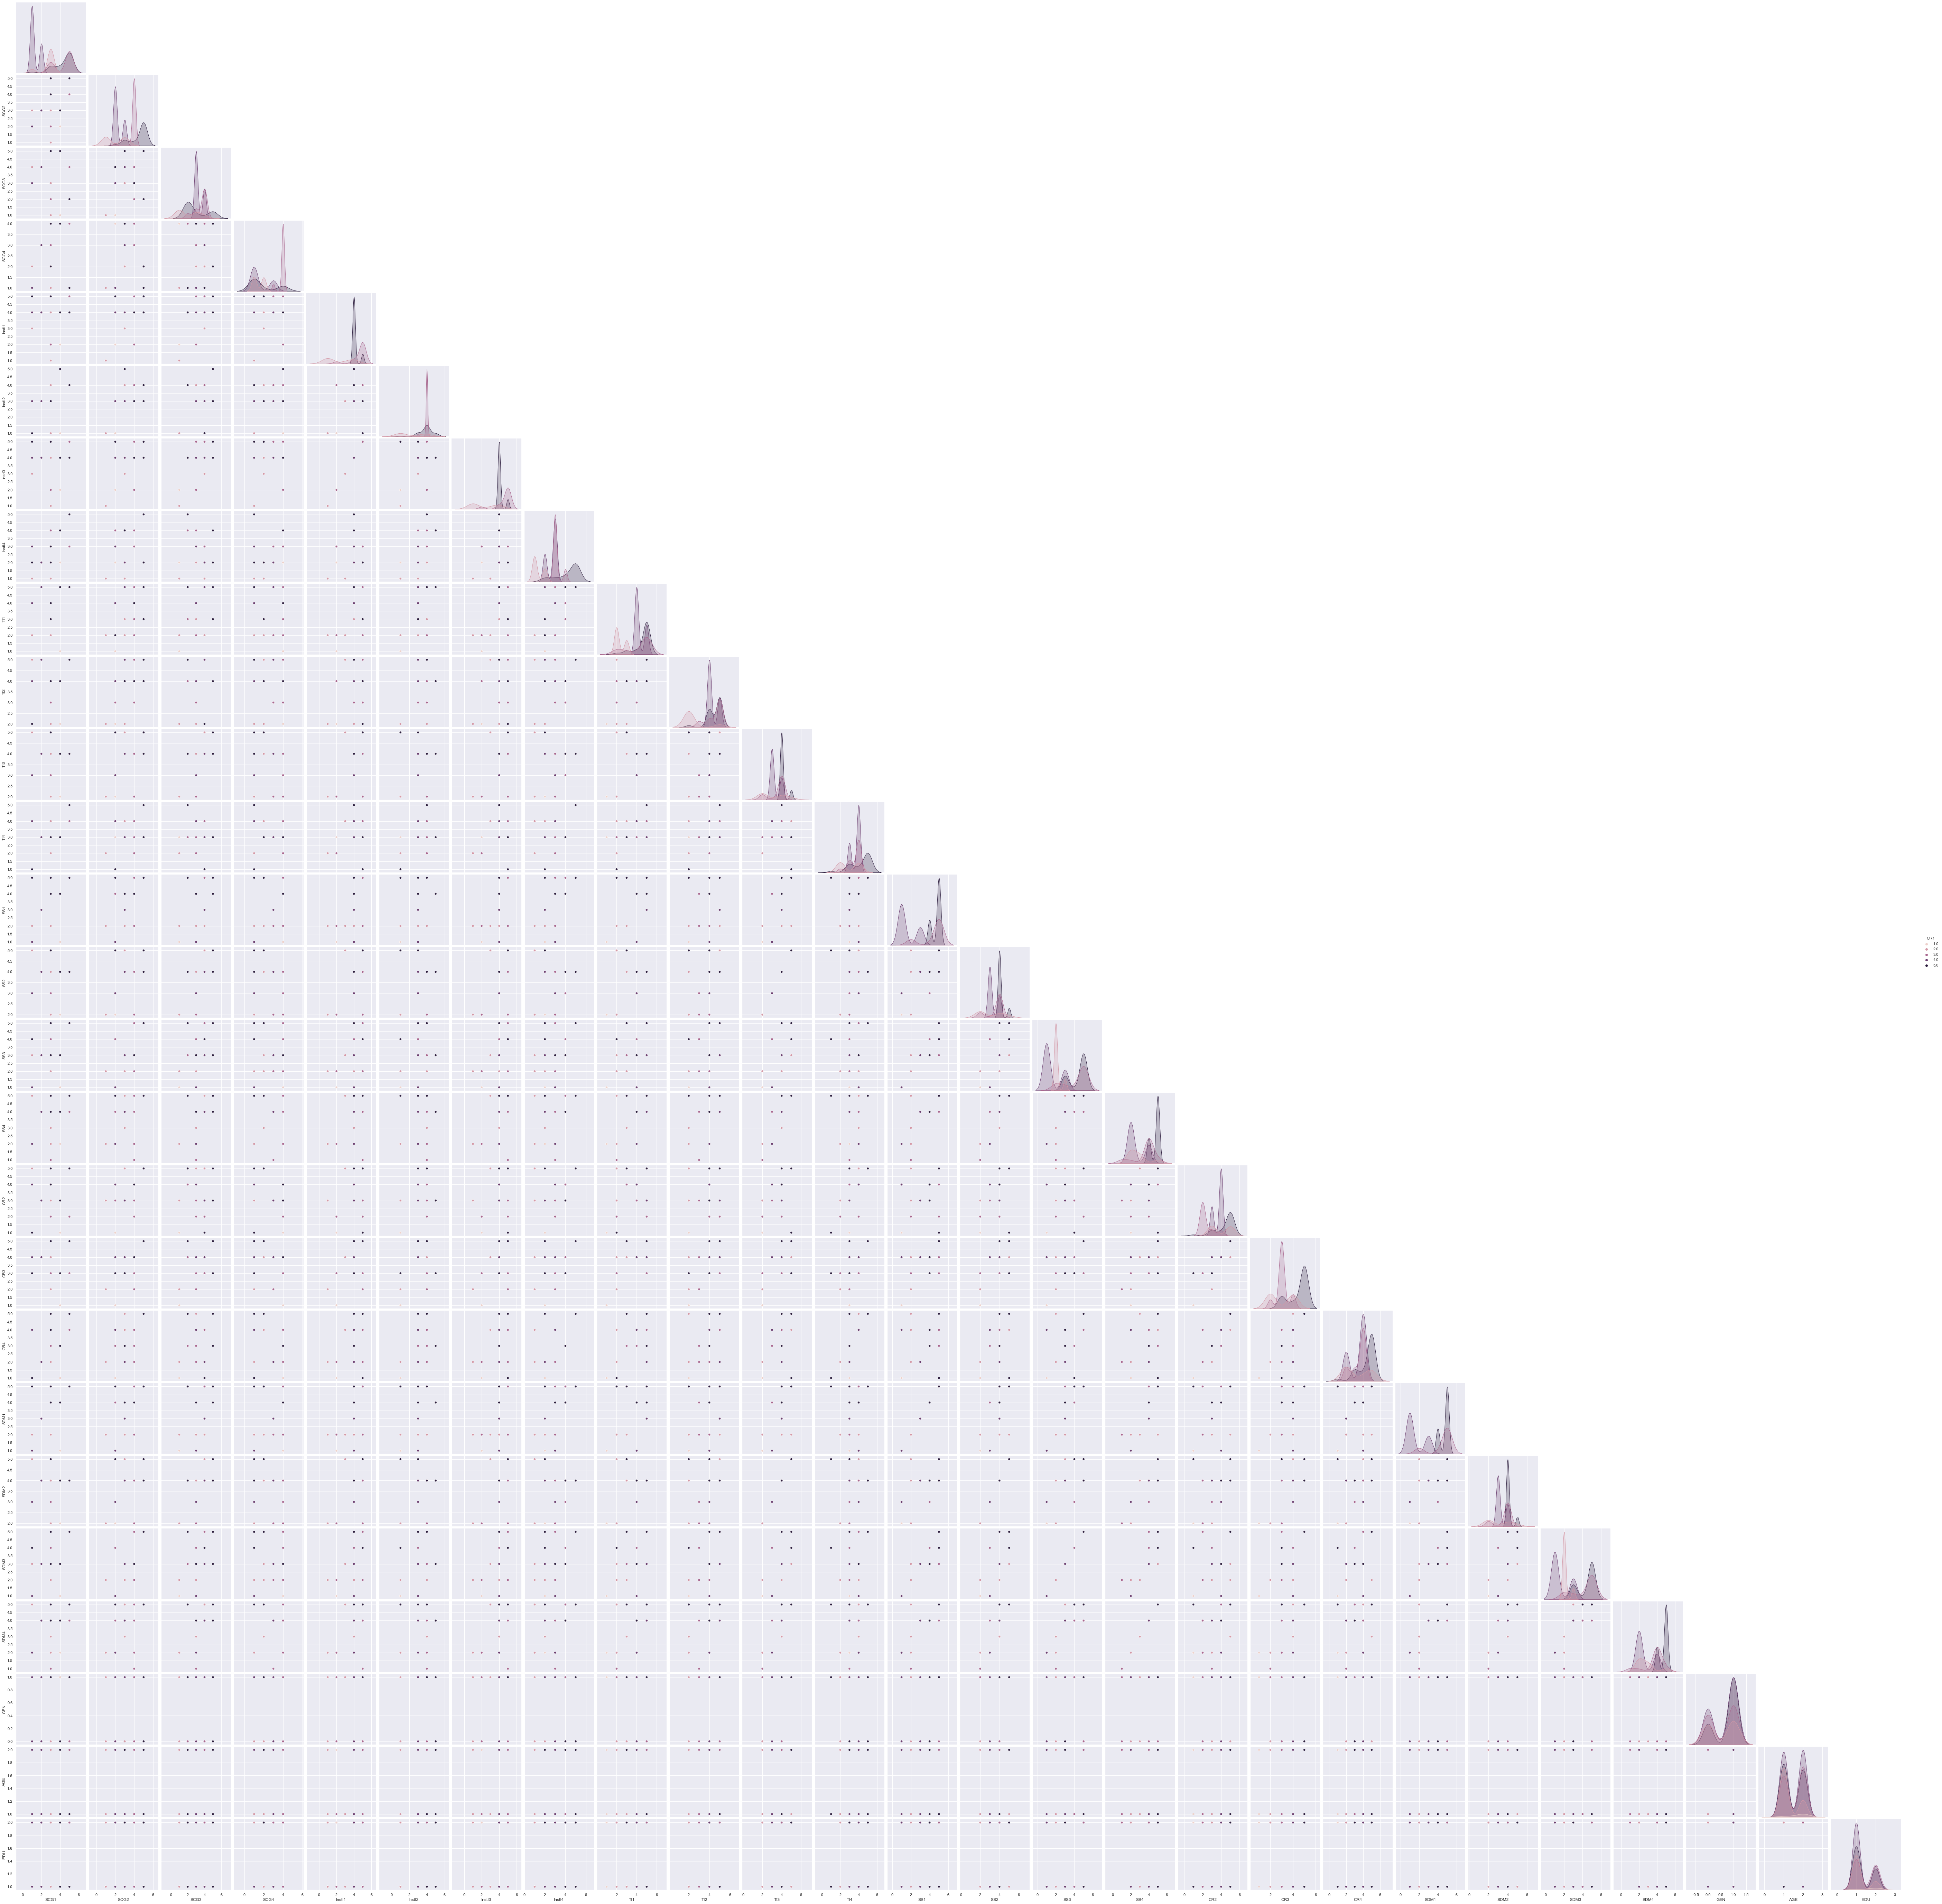

In [69]:
#A pairplot plots different graphs across all the columns/features to give an overview on how they all relate tp each other
plt.figure(figsize=(15,20))
sns.pairplot(data, hue='CR1', corner=True, height=3)
plt.show()

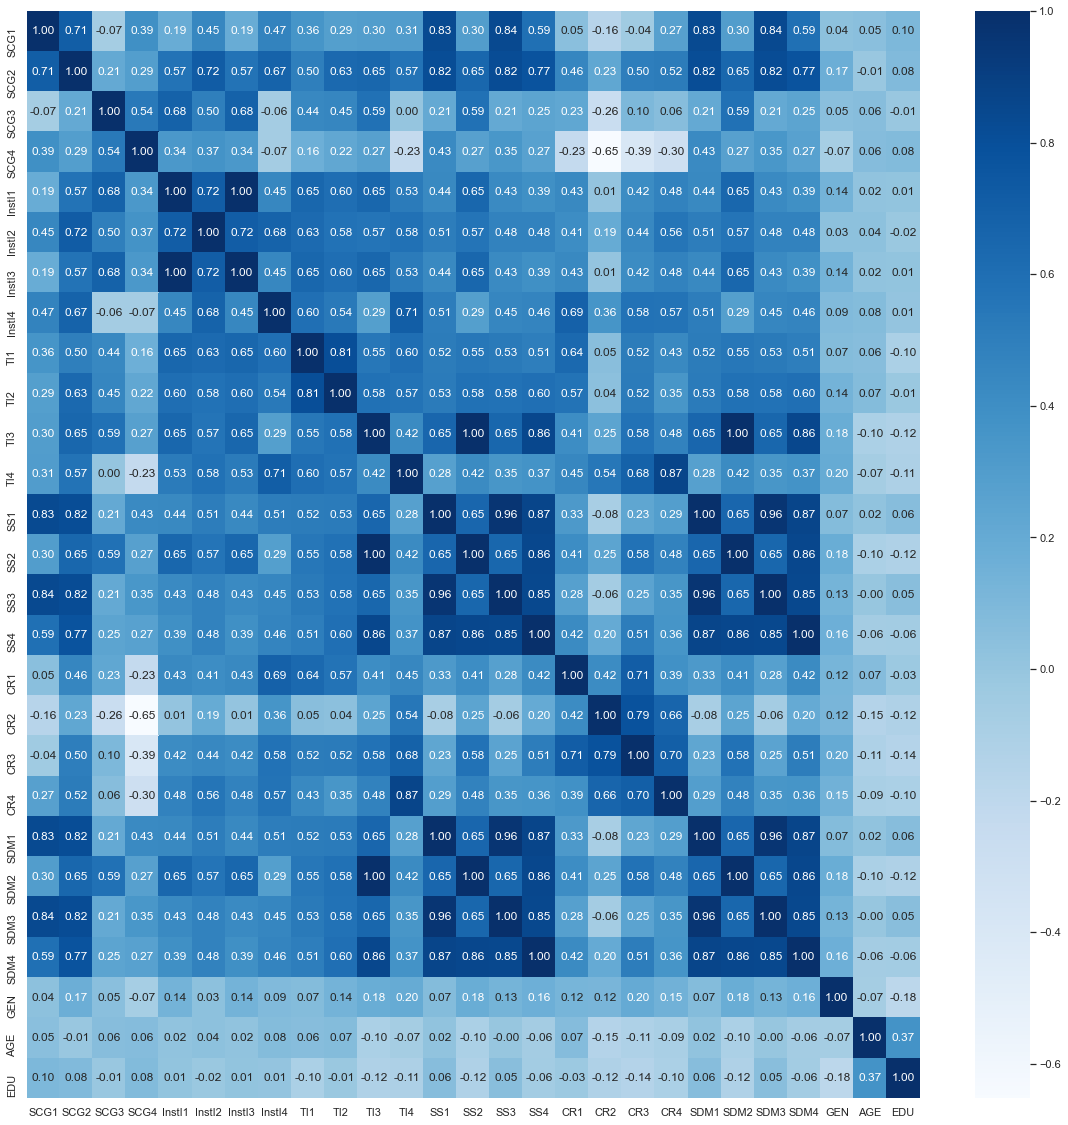

In [70]:
plt.figure(figsize =(20,20))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap=sns.color_palette("Blues", as_cmap=True))
plt.show()

<Figure size 1440x1440 with 0 Axes>

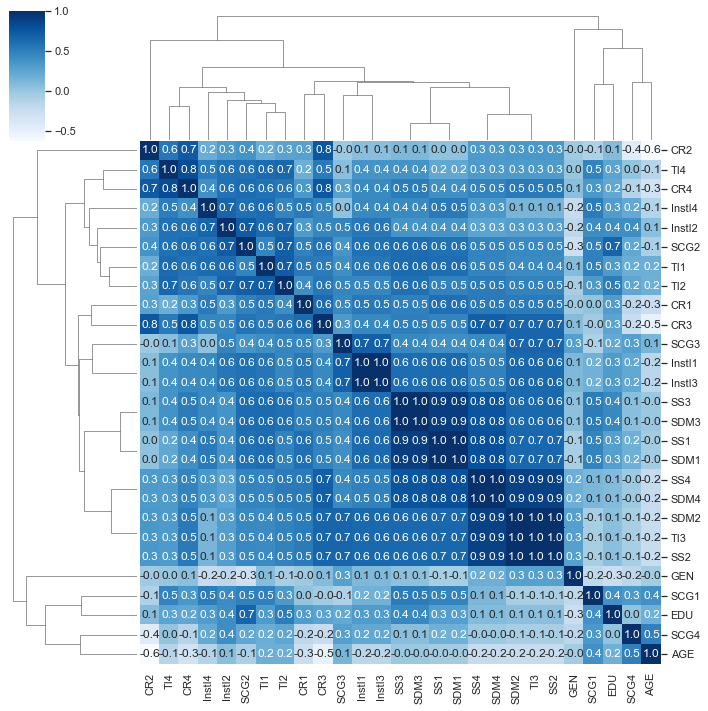

In [71]:
plt.figure(figsize =(20,20))
sns.clustermap(data.head(20).corr(), annot=True, fmt=".1f", cmap=sns.color_palette("Blues", as_cmap=True))
plt.show()

### Profiling:
* The above Clustermap indicate the following Segmentation:
1. Cluster 1 - No Crime: Gen,SCG1, EDU, SCG4 and AGE  where we observe a positive correlation across these feature. We also note that this cluster is not associated with any crime feature
2. Cluster 2 - Crime: CR1, CR3, SCG3, Instl1,Instl2, Instl3,SS3, SDM3, SS1, SDM4,SDm2, SS4,SDM4, SDM2, TI3 form part of this cluser. As crime grows the city implements many innovations.
3. Cluster 3 - Crime Infested: CR2, TI4, CR4, Instl4, Instl2, SCG2, TI1, TI2

### Feature Engineering 

In [72]:
# The crime_risk is 0 and 1- 0 if EDU is 1 and 1 where EDu is 2 , this is normalized to 0-100% which 50% being the mid poin 

mapped_edu = {1: 1, 2: 0}
data['Crime_risk'] = data['EDU'].map(lambda x: mapped_edu[x])

In [73]:
#check dataframe
data.sample(10)

,SCG1,SCG2,SCG3,SCG4,InstI1,InstI2,InstI3,InstI4,TI1,TI2,TI3,TI4,SS1,SS2,SS3,SS4,CR1,CR2,CR3,CR4,SDM1,SDM2,SDM3,SDM4,GEN,AGE,EDU,Crime_risk
53,5.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,3.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0,1.0,1.0,2.0,0
31,3.0,3.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,4.0,4.0,2.0,4.0,2.0,3.0,2.0,5.0,4.0,5.0,2.0,4.0,2.0,3.0,0.0,1.0,1.0,1
8,5.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,3.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0,1.0,2.0,2.0,0
100,1.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,1.0,3.0,1.0,2.0,4.0,4.0,4.0,4.0,1.0,3.0,1.0,2.0,0.0,1.0,1.0,1
118,4.0,3.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,0.0,2.0,2.0,0
84,1.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,1.0,3.0,1.0,2.0,4.0,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,2.0,2.0,0
7,5.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,3.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0,1.0,2.0,1.0,1
165,1.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,1.0,3.0,1.0,2.0,4.0,4.0,4.0,4.0,1.0,3.0,1.0,2.0,1.0,2.0,1.0,1
85,4.0,3.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,5.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,0.0,2.0,2.0,0
54,1.0,2.0,3.0,1.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,1.0,3.0,1.0,2.0,4.0,4.0,4.0,4.0,1.0,3.0,1.0,2.0,0.0,1.0,2.0,0


In [74]:
#check normalized
data.Crime_risk.value_counts( ascending=False)

1    145
0     69
Name: Crime_risk, dtype: int64

In [75]:
#Validating 
145+69

214

* Operation was perform for all the rows

In [76]:
#creating a deep copy of the dataframe
df = data.copy()

### Data Scaling 

In [77]:
df.columns

Index(['SCG1', 'SCG2', 'SCG3', 'SCG4', 'InstI1', 'InstI2', 'InstI3', 'InstI4',
       'TI1', 'TI2', 'TI3', 'TI4', 'SS1', 'SS2', 'SS3', 'SS4', 'CR1', 'CR2',
       'CR3', 'CR4', 'SDM1', 'SDM2', 'SDM3', 'SDM4', 'GEN', 'AGE', 'EDU',
       'Crime_risk'],
      dtype='object')

In [78]:
# Scaling of numerical values 
df_vars = ['SCG1', 'SCG2', 'SCG3', 'SCG4', 'InstI1', 'InstI2', 'InstI3', 'InstI4',
       'TI1', 'TI2', 'TI3', 'TI4', 'SS1', 'SS2', 'SS3', 'SS4', 'CR1', 'CR2',
       'CR3', 'CR4', 'SDM1', 'SDM2', 'SDM3', 'SDM4', 'GEN', 'AGE', 'EDU',
       'Crime_risk']

#importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[df_vars] = scaler.fit_transform(df[df_vars])

In [79]:
#Check if normilization worked
df.sample(10)

,SCG1,SCG2,SCG3,SCG4,InstI1,InstI2,InstI3,InstI4,TI1,TI2,TI3,TI4,SS1,SS2,SS3,SS4,CR1,CR2,CR3,CR4,SDM1,SDM2,SDM3,SDM4,GEN,AGE,EDU,Crime_risk
23,0.00,0.25,0.50,0.000000,0.75,0.50,0.75,0.50,0.75,0.666667,0.333333,0.75,0.00,0.333333,0.00,0.25,0.75,0.75,0.75,0.75,0.00,0.333333,0.00,0.25,1.0,0.0,0.0,1.0
174,0.50,1.00,1.00,0.333333,1.00,0.50,1.00,0.25,0.50,0.666667,1.000000,0.50,1.00,1.000000,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1.00,1.00,1.0,1.0,1.0,0.0
78,1.00,0.75,0.75,1.000000,1.00,0.75,1.00,0.50,1.00,1.000000,0.666667,0.75,1.00,0.666667,1.00,0.75,0.50,0.25,0.50,0.75,1.00,0.666667,1.00,0.75,0.0,0.0,0.0,1.0
148,0.50,0.75,0.50,0.666667,1.00,0.75,1.00,0.50,0.25,0.333333,0.000000,0.50,0.25,0.000000,0.25,0.00,0.50,0.50,0.25,0.25,0.25,0.000000,0.25,0.00,0.0,0.0,1.0,0.0
34,0.25,0.50,0.75,0.666667,0.75,0.50,0.75,0.25,1.00,1.000000,0.666667,0.50,0.50,0.666667,0.50,0.75,0.75,0.50,0.75,0.25,0.50,0.666667,0.50,0.75,0.0,1.0,1.0,0.0
57,1.00,0.75,0.75,1.000000,1.00,0.75,1.00,0.50,1.00,1.000000,0.666667,0.75,1.00,0.666667,1.00,0.75,0.50,0.25,0.50,0.75,1.00,0.666667,1.00,0.75,0.0,0.0,0.0,1.0
106,0.50,0.75,0.50,0.666667,1.00,0.75,1.00,0.50,0.25,0.333333,0.000000,0.50,0.25,0.000000,0.25,0.00,0.50,0.50,0.25,0.25,0.25,0.000000,0.25,0.00,1.0,1.0,1.0,0.0
137,0.00,0.25,0.50,0.000000,0.75,0.50,0.75,0.50,0.75,0.666667,0.333333,0.75,0.00,0.333333,0.00,0.25,0.75,0.75,0.75,0.75,0.00,0.333333,0.00,0.25,1.0,1.0,0.0,1.0
65,0.00,0.25,0.50,0.000000,0.75,0.50,0.75,0.50,0.75,0.666667,0.333333,0.75,0.00,0.333333,0.00,0.25,0.75,0.75,0.75,0.75,0.00,0.333333,0.00,0.25,1.0,1.0,1.0,0.0
91,1.00,0.75,0.75,1.000000,1.00,0.75,1.00,0.50,1.00,1.000000,0.666667,0.75,1.00,0.666667,1.00,0.75,0.50,0.25,0.50,0.75,1.00,0.666667,1.00,0.75,0.0,1.0,1.0,0.0


## Data Preparation

In [80]:
#imoprting sklearn libraries
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


#%matplotlib inline

# Libraries to tune model, get different metric scores, and split data

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [81]:
#Dependennt vs Independent feature split, we drop SS3 since it performs similar to SS1
X = df.drop(['SS3','EDU'],axis=1) #predictors
y = df['Crime_risk'] #predicted feature

In [82]:
# Train vs test split w.r.t X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


X_train.sample(n=10)

,SCG1,SCG2,SCG3,SCG4,InstI1,InstI2,InstI3,InstI4,TI1,TI2,TI3,TI4,SS1,SS2,SS4,CR1,CR2,CR3,CR4,SDM1,SDM2,SDM3,SDM4,GEN,AGE,Crime_risk
196,0.25,0.50,0.75,0.666667,0.75,0.50,0.75,0.25,1.00,1.000000,0.666667,0.50,0.50,0.666667,0.75,0.75,0.50,0.75,0.25,0.50,0.666667,0.50,0.75,0.0,0.0,1.0
175,0.50,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.25,0.000000,0.000000,0.25,0.25,0.000000,0.25,0.25,0.50,0.25,0.25,0.25,0.000000,0.25,0.25,0.0,1.0,1.0
148,0.50,0.75,0.50,0.666667,1.00,0.75,1.00,0.50,0.25,0.333333,0.000000,0.50,0.25,0.000000,0.00,0.50,0.50,0.25,0.25,0.25,0.000000,0.25,0.00,0.0,0.0,0.0
63,0.50,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.25,0.000000,0.000000,0.25,0.25,0.000000,0.25,0.25,0.50,0.25,0.25,0.25,0.000000,0.25,0.25,0.0,0.0,0.0
1,0.75,0.25,0.00,1.000000,0.25,0.00,0.25,0.25,0.00,0.000000,0.000000,0.50,0.00,0.000000,0.25,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.25,1.0,1.0,1.0
12,0.50,0.75,0.50,0.666667,1.00,0.75,1.00,0.50,0.25,0.333333,0.000000,0.50,0.25,0.000000,0.00,0.50,0.50,0.25,0.25,0.25,0.000000,0.25,0.00,0.0,0.0,0.0
170,0.25,0.50,0.75,0.666667,0.75,0.50,0.75,0.25,1.00,1.000000,0.666667,0.50,0.50,0.666667,0.75,0.75,0.50,0.75,0.25,0.50,0.666667,0.50,0.75,0.0,1.0,0.0
61,1.00,1.00,0.25,0.000000,0.75,0.75,0.75,1.00,1.00,1.000000,0.666667,1.00,1.00,0.666667,1.00,1.00,1.00,1.00,1.00,1.00,0.666667,1.00,1.00,1.0,0.0,1.0
7,1.00,0.75,0.75,1.000000,1.00,0.75,1.00,0.50,1.00,1.000000,0.666667,0.75,1.00,0.666667,0.75,0.50,0.25,0.50,0.75,1.00,0.666667,1.00,0.75,1.0,1.0,1.0
162,0.50,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.25,0.000000,0.000000,0.25,0.25,0.000000,0.25,0.25,0.50,0.25,0.25,0.25,0.000000,0.25,0.25,0.0,1.0,0.0


### Building the model
### Model evaluation criterion
### Model can make wrong predictions as:
* Predicting a city is less crime_risk while it is not - Loss of opportunity campaign
* Predicting a city is high crime_risk while is it not  - Loss of resources

### Which case is more important?
*Predicting a city is high crime_risk while is it not
### How to reduce this loss i.e need to reduce False Negatives?
We need to maximize on Recall or F1 score, the focus should be on increasing Recall or minimizing the false negatives.

User Defined Function



In [83]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score2(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(train_y,pred_train)
    test_acc = accuracy_score(test_y,pred_test)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("ROC-AUC Score on training set:",metrics.roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set:",metrics.roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [84]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score1(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(train_y,pred_train)
    test_acc = accuracy_score(test_y,pred_test)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
   # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
    return score_list # returning the list with train and test scoresbb

In [85]:
## Defining a function for better visualization of confusion matrix
def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    data_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(data_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Multicollinearity

In [86]:
#Multicolliearity check
# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)


## Variance Inflation Factor - How independent Features influences each other

In [87]:
#VIF before 
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const         0.000000
SCG1               inf
SCG2               inf
SCG3               inf
SCG4               inf
InstI1             inf
InstI2             inf
InstI3             inf
InstI4             inf
TI1                inf
TI2                inf
TI3                inf
TI4                inf
SS1                inf
SS2                inf
SS4                inf
CR1                inf
CR2                inf
CR3                inf
CR4                inf
SDM1               inf
SDM2               inf
SDM3               inf
SDM4               inf
GEN           1.248467
AGE           1.329237
Crime_risk    1.414151
dtype: float64



### Due to this high variance we will need to explore PCa to reduce variation among Feature

In [95]:
#Import PCA
from sklearn.decomposition import PCA

In [96]:
#Check Principal COmponent Analysus
pca = PCA(random_state=42)

In [97]:
pca.fit(X_train)

PCA(random_state=42)

In [98]:
pca.components_

array([[-2.57011839e-01, -2.45896950e-01, -8.81090993e-02,
        -1.49909941e-01, -1.51261828e-01, -1.48840871e-01,
        -1.51261828e-01, -1.50407112e-01, -1.79894695e-01,
        -2.23706389e-01, -2.01697295e-01, -1.01806436e-01,
        -3.53847254e-01, -2.01697295e-01, -2.59013371e-01,
        -1.08071420e-01, -2.35439547e-02, -9.90088939e-02,
        -1.28883115e-01, -3.53847254e-01, -2.01697295e-01,
        -3.35772272e-01, -2.59013371e-01, -3.52962283e-02,
         2.36286063e-02,  1.02217672e-02],
       [ 2.18384182e-01,  1.67644487e-03,  2.45792904e-02,
         4.55235464e-01, -6.00158187e-02, -2.83228133e-02,
        -6.00158187e-02, -1.23603902e-01, -1.19663516e-01,
        -8.63286020e-02, -8.93144367e-02, -1.82924825e-01,
         1.49336658e-01, -8.93144367e-02, -2.44657357e-02,
        -2.14943547e-01, -3.21501878e-01, -2.65744807e-01,
        -2.39877990e-01,  1.49336658e-01, -8.93144367e-02,
         1.09498838e-01, -2.44657357e-02, -3.23293991e-01,
         2.73

In [99]:
pca.explained_variance_ratio_

array([4.18058517e-01, 1.47491647e-01, 1.10240767e-01, 7.94152616e-02,
       6.99075590e-02, 4.71917345e-02, 4.20931078e-02, 2.66996365e-02,
       2.04084094e-02, 1.18688269e-02, 7.66315346e-03, 7.33731326e-03,
       3.57313520e-03, 3.15960422e-03, 2.76297429e-03, 1.19597638e-03,
       7.27930351e-04, 2.04445183e-04, 4.78279101e-33, 3.60873302e-33,
       2.84074657e-33, 2.10454307e-33, 2.10454307e-33, 2.10454307e-33,
       2.10454307e-33, 2.10454307e-33])

In [100]:
#Preparing to plot
var_cumu = np.cumsum(pca.explained_variance_ratio_)

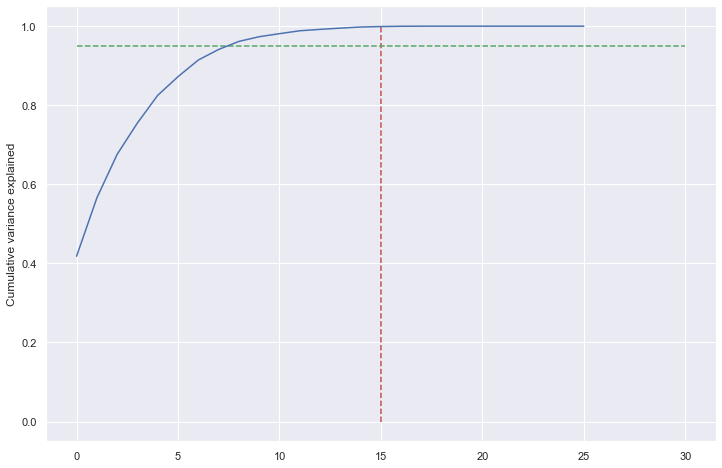

In [101]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

* we observe that 95% of our features explain the model

## Applying Logistic Regrassion on PCA

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
learner_pca = LogisticRegression()

In [104]:
from sklearn.decomposition import IncrementalPCA

In [107]:
pca_final = IncrementalPCA(n_components=26)

In [108]:
df_train_pca = pca_final.fit_transform(X_train)

In [109]:
df_train_pca.shape

(149, 26)

In [110]:
#Correction 
corrmat = np.corrcoef(df_train_pca.transpose())

In [111]:
corrmat.shape

(26, 26)

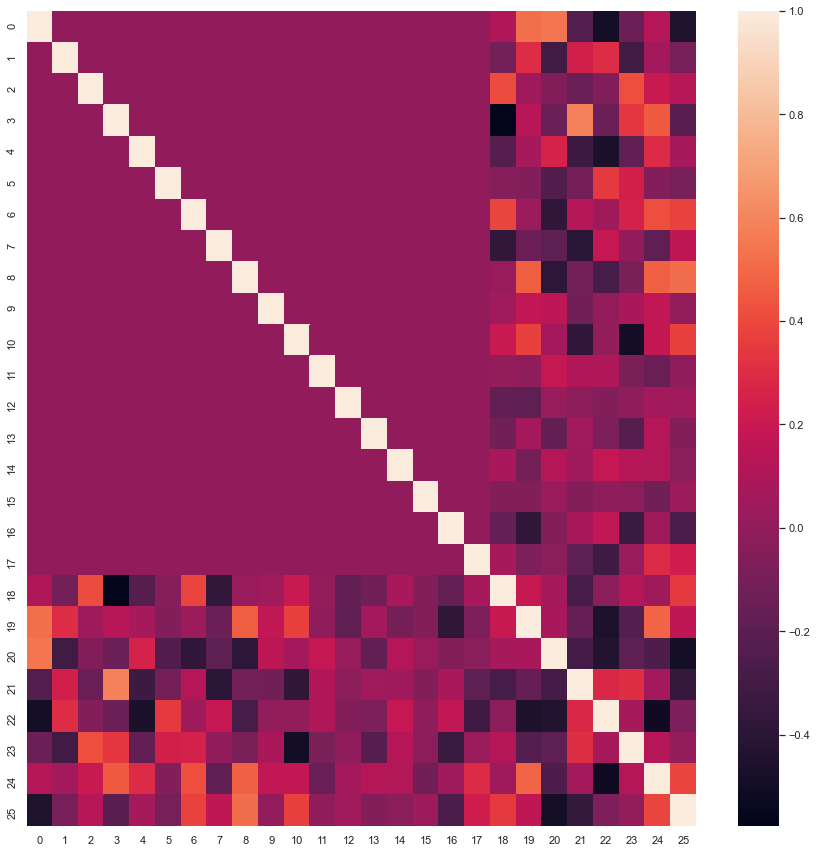

In [112]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat)
plt.show()

* we notice marginal correlation with mostly no correlation amongst the variance

In [113]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(65, 26)

In [114]:
learner_pca = LogisticRegression()

In [115]:
df_train_pca.shape

(149, 26)

In [116]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [117]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

## Model Metric Evaluation

In [118]:
from sklearn import metrics

In [119]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'1.0'

We see an overall AUC score of 100% looks like we did a great job.

In [120]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [121]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [122]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

### Feature Selction & Ranking 

In [123]:
#Top Features that predict the model
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SCG1', True, 1),
 ('SCG2', True, 1),
 ('SCG3', True, 1),
 ('SCG4', True, 1),
 ('InstI1', True, 1),
 ('InstI2', True, 1),
 ('InstI3', True, 1),
 ('InstI4', True, 1),
 ('TI1', True, 1),
 ('TI2', True, 1),
 ('TI3', True, 1),
 ('TI4', True, 1),
 ('SS1', True, 1),
 ('SS2', True, 1),
 ('SS4', True, 1),
 ('CR1', True, 1),
 ('CR2', True, 1),
 ('CR3', True, 1),
 ('CR4', True, 1),
 ('SDM1', True, 1),
 ('SDM2', True, 1),
 ('SDM3', True, 1),
 ('SDM4', True, 1),
 ('GEN', True, 1),
 ('AGE', True, 1),
 ('Crime_risk', True, 1)]

## Conclusion

* The lack of variability may have lead to a perfect ROC_AUC score of 100% - we think that this can be attributed to a small dataset.



### Recommendation:
1. More than data with varibaility can be used to rescore the model
2. The model output can be used for campaiging low education but high crime areas to lower down crime. This will need to be done in alignment to SAPS and department of education applicable policies
3. Model out can be intergrated with the etoll guntree to monitor criminal syndicate. Policy will need to be put in place to achieve this outcome.
4. Model output can be utlized together with drone monitoring to reduce crime  in alignment with existing law enforcement policies

In [124]:
#col = X_train.columns[rfe.support_]

In [125]:
#X_train.columns[~rfe.support_]

Index([], dtype='object')

In [126]:
#import statsmodels.api as sm

In [129]:
#X_train_sm = sm.add_constant(X_train[col])
#logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
#res = logm2.fit()
#res.summary()

In [130]:
#initializing our GLM  model via statsmodel
#glm = sm.GLM(y_train, X_train.astype(float))
#lg = glm.fit()

#print(lg.summary())

#print('')
# Let's check model performances for this model
#scores_LR = get_metrics_score1(lg,X_train,X_test,y_train,y_test,flag=True)

In [131]:
#!pip install firthlogist

In [132]:
#from firthlogist import load_endometrial
#import statsmodels.api as sm
#X, y, feature_names = load_endometrial()
#log_reg = sm.Logit(y, X).fit()